In [2]:
# necessary Libraries impotrs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from collections import Counter
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")
%matplotlib inline


In [3]:
# Graph setting for Further use 
sns.set(rc={'figure.figsize':(20,8)})
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
pd.set_option('display.max.rows',130)
pd.set_option('display.max.columns',130)
pd.set_option('float_format', '{:.2f}'.format)


In [4]:
lead = pd.read_csv('Leads.csv')

In [5]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [6]:
# Checking shape 
lead.shape

(9240, 37)

The Data set is Consist of 37 columns and 9240 rows 

In [7]:
# checking of basic information about the data set 
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [9]:
# checking null or missing values 
percentage_col_ad = (pd.isnull(lead).sum()/len(lead)*100).sort_values(ascending=False)
print(percentage_col_ad[percentage_col_ad> 40.00])


Lead Quality                  51.59
Asymmetrique Activity Index   45.65
Asymmetrique Profile Score    45.65
Asymmetrique Activity Score   45.65
Asymmetrique Profile Index    45.65
dtype: float64


In [10]:
# created a list of all the columns where missing value percentage is greater than equal to 40 
drop_list_ad = [columns for columns in lead.columns if lead[columns].isnull().mean() >= 0.40]
print(f"there are total {len(drop_list_ad)} columns where missing values are grater than 40%")

# this will drop all the columns present in the list from app_data dataframe 
lead.drop(labels=drop_list_ad,axis=1,inplace=True)

there are total 5 columns where missing values are grater than 40%


In [11]:
# to check how many columns are left in lead dataframe after Dropping 
print(f'there are total columns present in lead is : {lead.shape[1]}')


there are total columns present in lead is : 32


In [12]:
# Checking the columns having less null percentage
(lead.isnull().sum()/len(lead)*100).sort_values(ascending=False)

Tags                                            36.29
Lead Profile                                    29.32
What matters most to you in choosing a course   29.32
What is your current occupation                 29.11
Country                                         26.63
How did you hear about X Education              23.89
Specialization                                  15.56
City                                            15.37
TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Receive More Updates About Our Courses           0.00
Update me on Supply Chain Content                0.00
Prospect ID                                      0.00
Digital Advertisement                            0.00
Get updates on DM Content                        0.00
I agree to pay the amount through cheque         0.00
A free copy of Mastering The

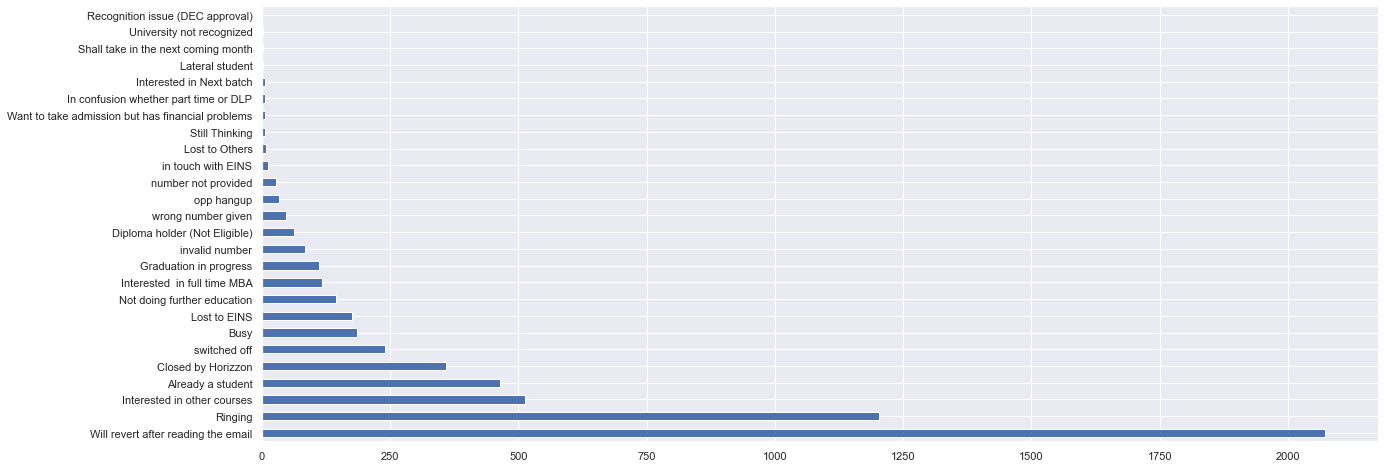

In [13]:
''' check no of unique values in the columns and update with Unknown as this information will be used for further 
    analysis so there might be chance of hampering the analysis if we drop these rows where value is missing hence 
    updating it with different values so it can be used in Analysis and it will be easy to identify. the percentage 
    is around 31% which is huge in our opinion. '''

lead['Tags'].value_counts()[:].plot(kind='barh')
plt.show()


In [14]:
lead.Tags.value_counts(normalize=True, dropna=False)

NaN                                                 0.36
Will revert after reading the email                 0.22
Ringing                                             0.13
Interested in other courses                         0.06
Already a student                                   0.05
Closed by Horizzon                                  0.04
switched off                                        0.03
Busy                                                0.02
Lost to EINS                                        0.02
Not doing further education                         0.02
Interested  in full time MBA                        0.01
Graduation in progress                              0.01
invalid number                                      0.01
Diploma holder (Not Eligible)                       0.01
wrong number given                                  0.01
opp hangup                                          0.00
number not provided                                 0.00
in touch with EINS             

In [15]:
# By looking at the numbers we can say that there are 36% values populated with NaN 
# so we need to keep them in a separate bucket and keeping the value as Unknown 

lead.Tags.fillna("Unknown", inplace=True)

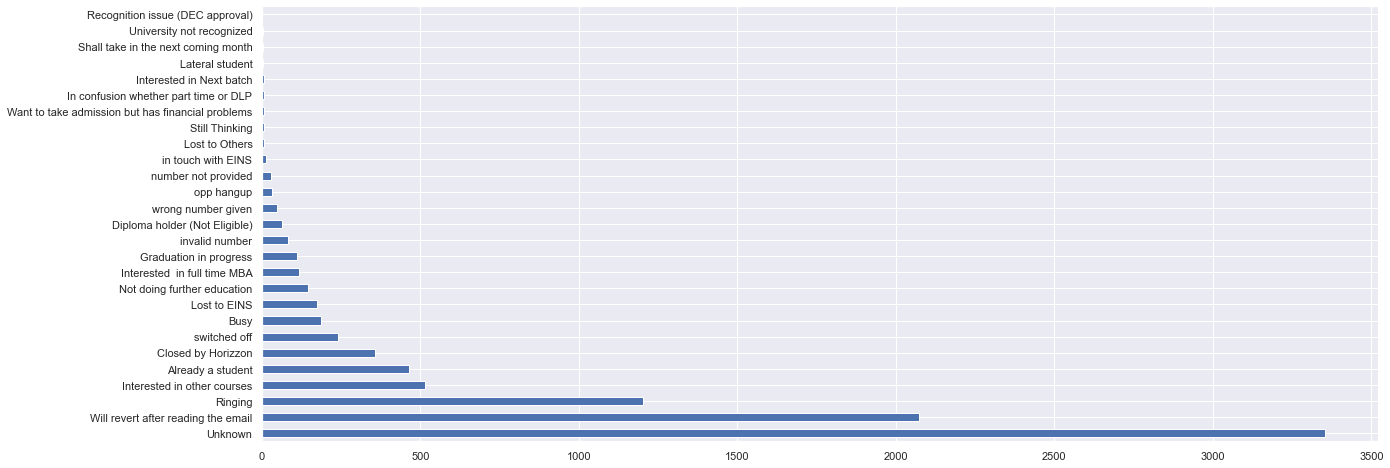

In [16]:
lead['Tags'].value_counts()[:].plot(kind='barh')
plt.show()

In [17]:
# Checking the column Lead Profile to fill the values depends upon the existing values 
lead['Lead Profile'].value_counts(normalize=True, dropna=False)

Select                        0.45
NaN                           0.29
Potential Lead                0.17
Other Leads                   0.05
Student of SomeSchool         0.03
Lateral Student               0.00
Dual Specialization Student   0.00
Name: Lead Profile, dtype: float64

In [18]:
# There are 29% of values are populated with NaN and converting it to Unknown
lead['Lead Profile'].fillna("Unknown", inplace=True)

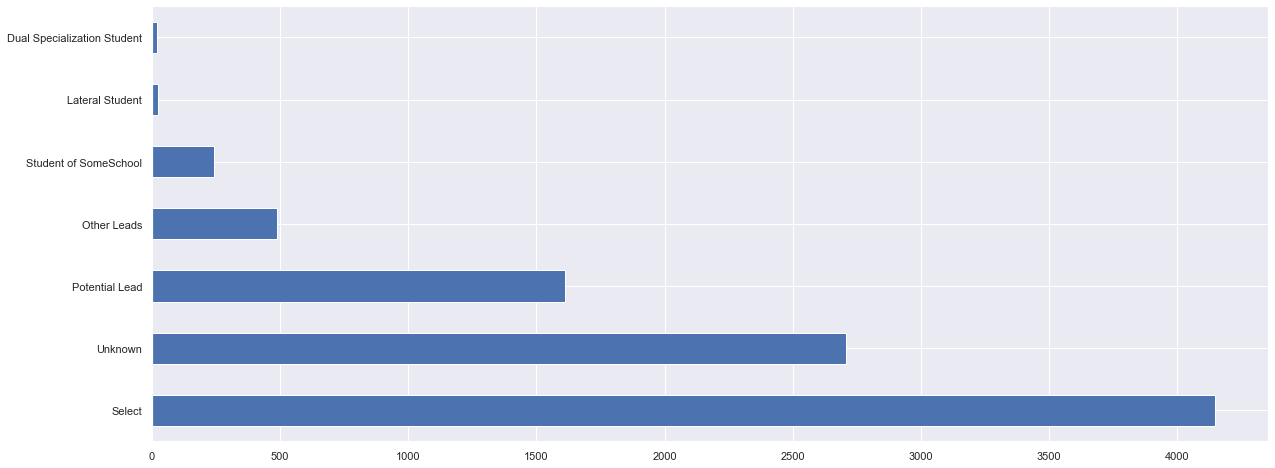

In [19]:
lead['Lead Profile'].value_counts()[:].plot(kind='barh')
plt.show()

In [20]:
# Check next Feature to Handle missing values 
lead['What matters most to you in choosing a course'].value_counts(normalize=True, dropna=False)

Better Career Prospects     0.71
NaN                         0.29
Flexibility & Convenience   0.00
Other                       0.00
Name: What matters most to you in choosing a course, dtype: float64

### According to the values 71% values are populated with "Better Career Prospects" and other 29% values are NaN then we can convert NaN to the same value as "Better Career Prospects" it will keep the data more aligned 

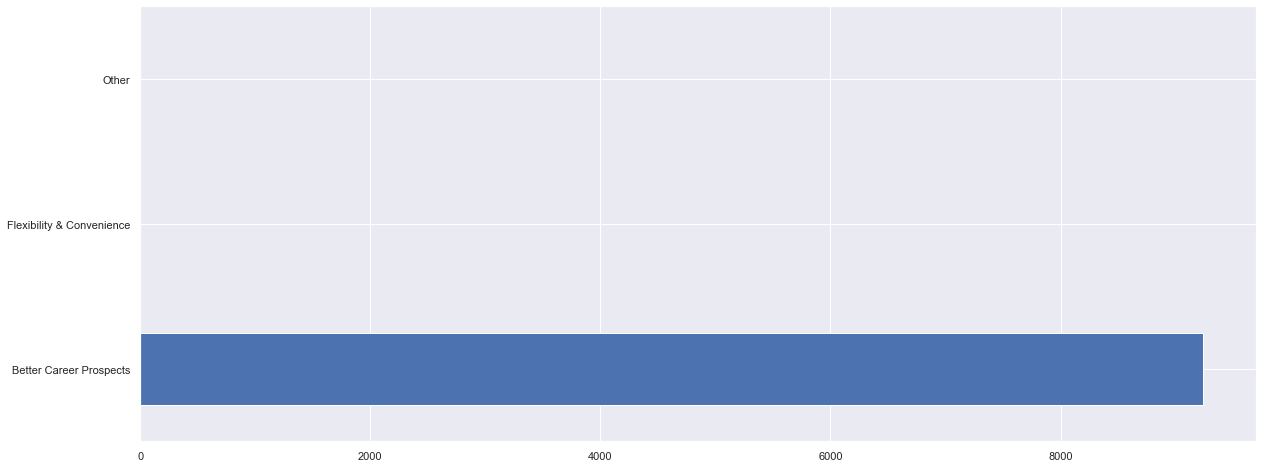

In [21]:
lead['What matters most to you in choosing a course'].fillna("Better Career Prospects", inplace=True)
lead['What matters most to you in choosing a course'].value_counts()[:].plot(kind='barh')
plt.show()

In [22]:
# Check next feature to handle NaN values "What is your current occupation"
lead['What is your current occupation'].value_counts(normalize=True, dropna=False)

Unemployed             0.61
NaN                    0.29
Working Professional   0.08
Student                0.02
Other                  0.00
Housewife              0.00
Businessman            0.00
Name: What is your current occupation, dtype: float64

### according to the values 61% values are populated with "Unemployed" and other 29% values are NaN then we can convert NaN to the same value as "Unemployed" it will keep the data more aligned 

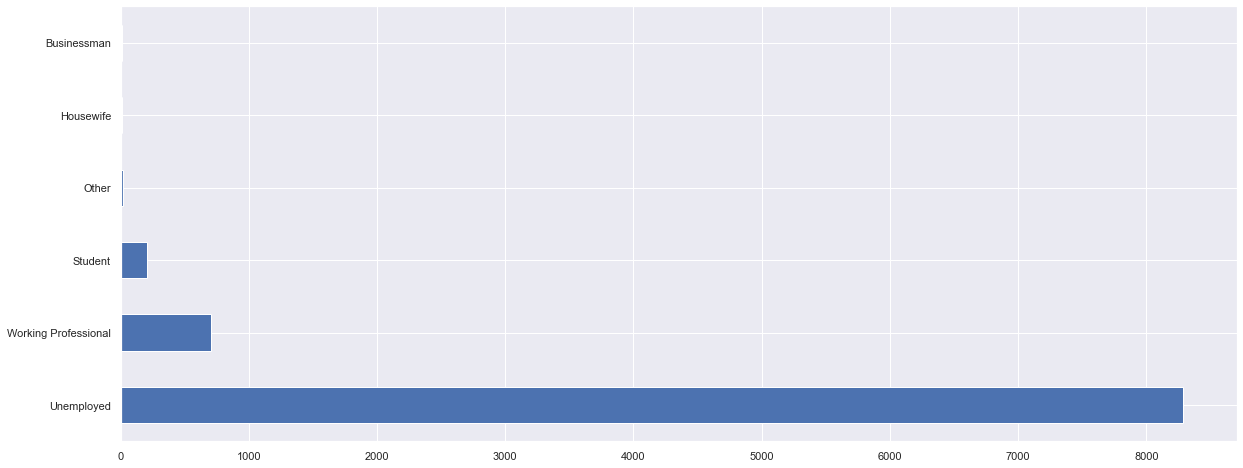

In [23]:
lead['What is your current occupation'].fillna("Unemployed", inplace=True)
lead['What is your current occupation'].value_counts()[:].plot(kind='barh')
plt.show()

In [24]:
# Check next feature to handle NaN values "Country"
lead['Country'].value_counts(normalize=True, dropna=False)

India                  0.70
NaN                    0.27
United States          0.01
United Arab Emirates   0.01
Singapore              0.00
Saudi Arabia           0.00
United Kingdom         0.00
Australia              0.00
Qatar                  0.00
Bahrain                0.00
Hong Kong              0.00
Oman                   0.00
France                 0.00
unknown                0.00
Kuwait                 0.00
South Africa           0.00
Canada                 0.00
Nigeria                0.00
Germany                0.00
Sweden                 0.00
Philippines            0.00
Uganda                 0.00
Italy                  0.00
Bangladesh             0.00
Netherlands            0.00
Asia/Pacific Region    0.00
China                  0.00
Belgium                0.00
Ghana                  0.00
Kenya                  0.00
Sri Lanka              0.00
Tanzania               0.00
Malaysia               0.00
Liberia                0.00
Switzerland            0.00
Denmark             

### according to the values 70% values are populated with "India" and other 27% values are NaN then we can convert NaN to the same value as "India" it will keep the data more aligned

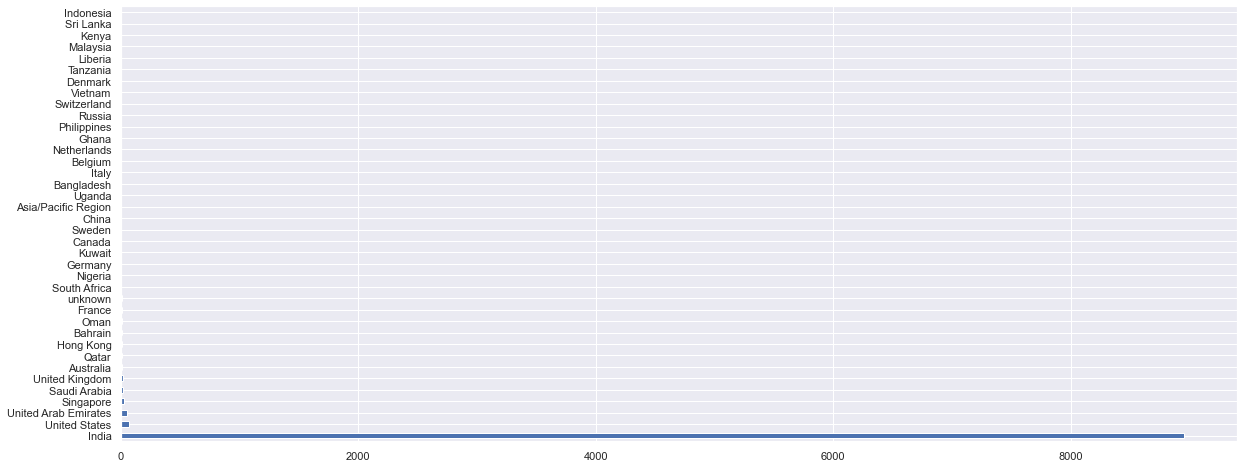

In [25]:
lead['Country'].fillna("India", inplace=True)
lead['Country'].value_counts()[:].plot(kind='barh')
plt.show()

In [26]:
# Check next feature to handle NaN values "How did you hear about X Education"
lead['How did you hear about X Education'].value_counts(normalize=True, dropna=False)

Select                  0.55
NaN                     0.24
Online Search           0.09
Word Of Mouth           0.04
Student of SomeSchool   0.03
Other                   0.02
Multiple Sources        0.02
Advertisements          0.01
Social Media            0.01
Email                   0.00
SMS                     0.00
Name: How did you hear about X Education, dtype: float64

### according to the values 55% values are populated with "Select" and other 24% values are NaN then we can convert NaN to the same value as "Select" it will keep the data more aligned

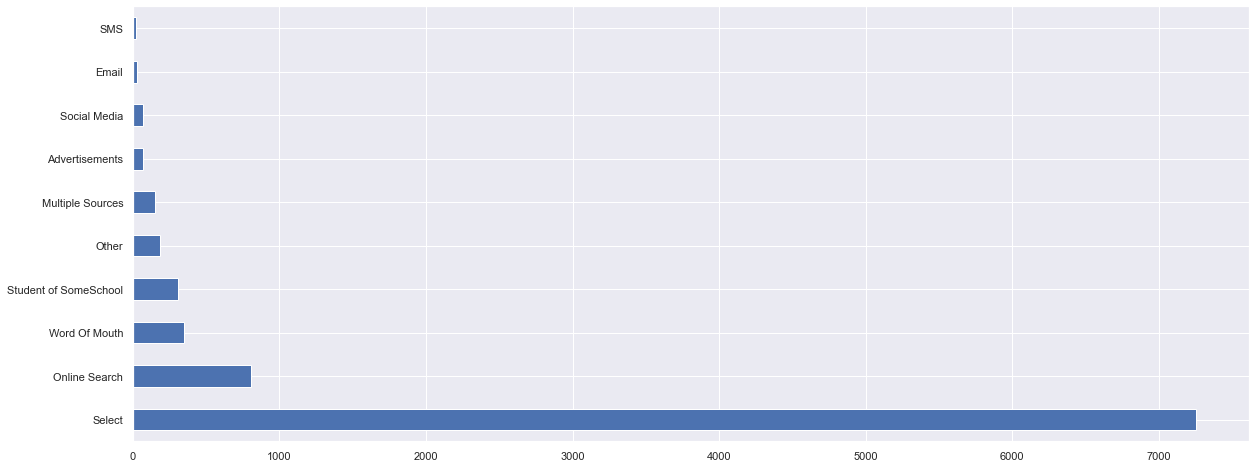

In [27]:
lead['How did you hear about X Education'].fillna("Select", inplace=True)
lead['How did you hear about X Education'].value_counts()[:].plot(kind='barh')
plt.show()

In [28]:
# Check next feature to handle NaN values "Specialization"
lead['Specialization'].value_counts(normalize=True, dropna=False)

Select                              0.21
NaN                                 0.16
Finance Management                  0.11
Human Resource Management           0.09
Marketing Management                0.09
Operations Management               0.05
Business Administration             0.04
IT Projects Management              0.04
Supply Chain Management             0.04
Banking, Investment And Insurance   0.04
Travel and Tourism                  0.02
Media and Advertising               0.02
International Business              0.02
Healthcare Management               0.02
Hospitality Management              0.01
E-COMMERCE                          0.01
Retail Management                   0.01
Rural and Agribusiness              0.01
E-Business                          0.01
Services Excellence                 0.00
Name: Specialization, dtype: float64

### According to the values we can conclude that they are fairly scattered and to handle missing values we need to create a separate bucket as Unknown  

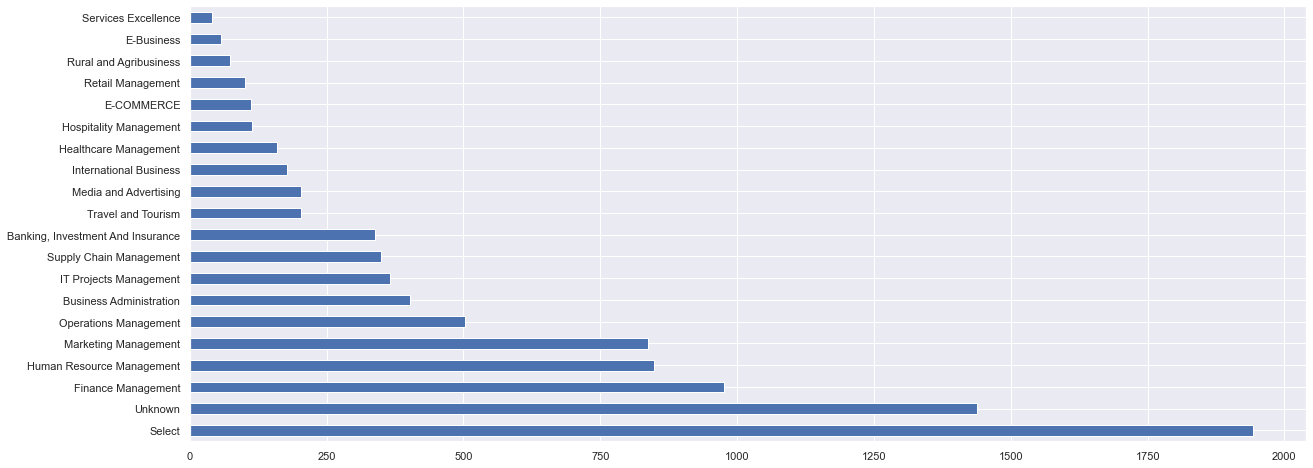

In [29]:
lead['Specialization'].fillna("Unknown", inplace=True)
lead['Specialization'].value_counts()[:].plot(kind='barh')
plt.show()

In [30]:
# Check next feature to handle NaN values "City"
lead['City'].value_counts(normalize=True, dropna=False)

Mumbai                        0.35
Select                        0.24
NaN                           0.15
Thane & Outskirts             0.08
Other Cities                  0.07
Other Cities of Maharashtra   0.05
Other Metro Cities            0.04
Tier II Cities                0.01
Name: City, dtype: float64

### according to the values 35% values are populated with "Mumbai" and other 24% values are NaN then we can convert NaN to the same value as "Mumbai" it will keep the data more aligned

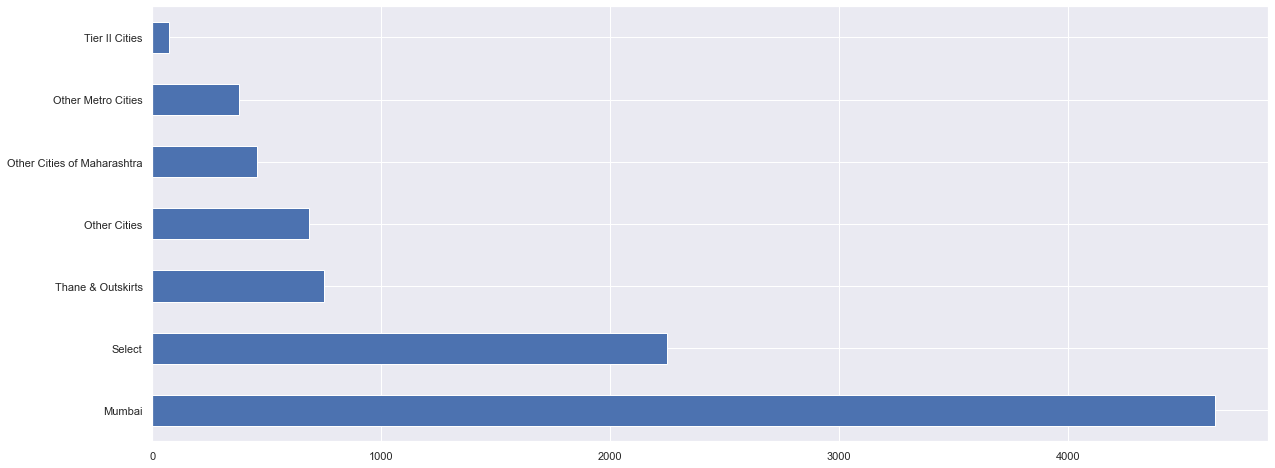

In [31]:
lead['City'].fillna("Mumbai", inplace=True)
lead['City'].value_counts()[:].plot(kind='barh')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

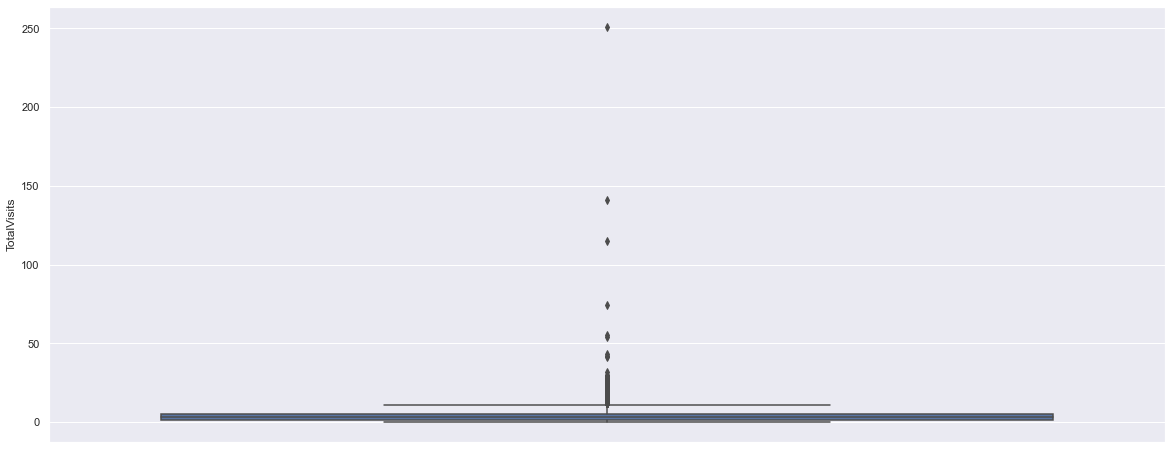

In [32]:
# Check next feature to handle NaN values "TotalVisits" As this Feature is of Floating type
# there are various methods to handle the outlier like 
# Visualisation (Box plot / Scatterplot) 2. IQR 3. Z-score 
# First we will use Visualisation Box plot and sctterplot 

sns.boxplot(y=lead['TotalVisits'])
plt.show


<AxesSubplot:ylabel='TotalVisits'>

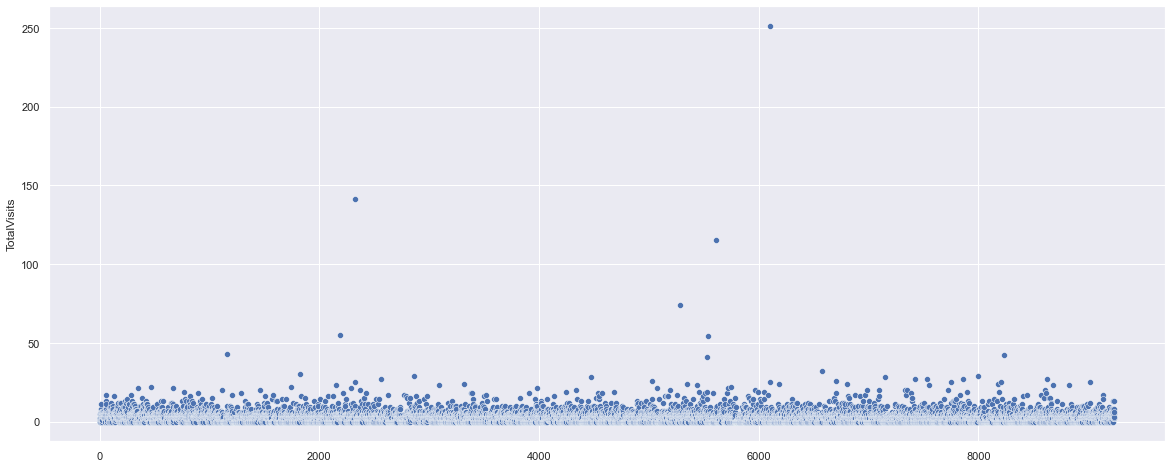

In [33]:
sns.scatterplot(data=lead['TotalVisits'])

In [34]:
# It is clearly visible that there are outliers we can use percentile to check the values of outliers
lead['TotalVisits'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.80, 0.85, 0.90, 0.95, 0.99])


count   9103.00
mean       3.45
std        4.85
min        0.00
5%         0.00
25%        1.00
50%        3.00
75%        5.00
80%        5.00
85%        6.00
90%        7.00
95%       10.00
99%       17.00
max      251.00
Name: TotalVisits, dtype: float64

<AxesSubplot:>

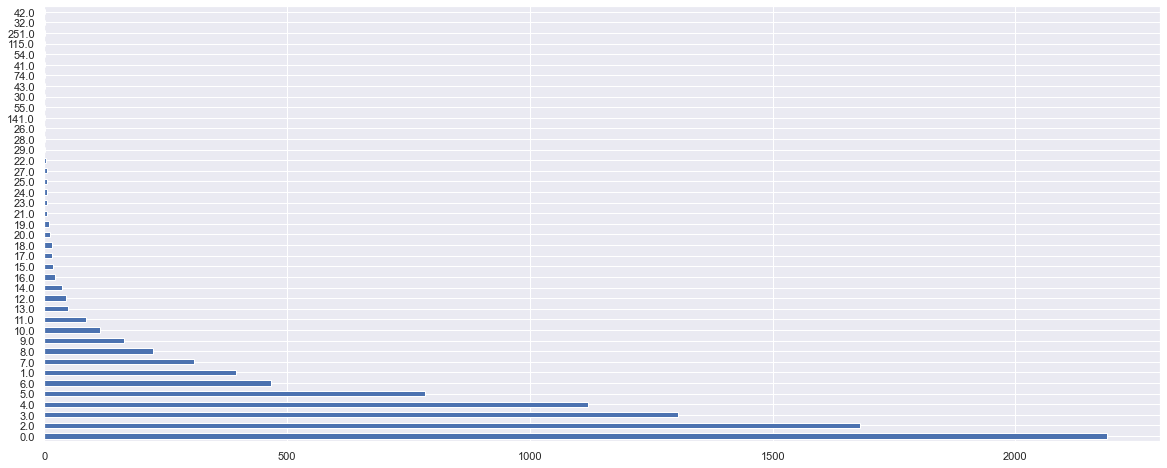

In [35]:
lead['TotalVisits'].value_counts()[:].plot(kind='barh')

In [36]:
# 99 Percentile value is 17 we can use this to see how many rows are there where value is greater than 17
print("Count of lead where TotalVists are greater than 17 ->",lead[lead['TotalVisits'] > 17]['Prospect ID'].count())
print("shape of the lead  ->",lead.shape[0])
Out_val = lead[lead['TotalVisits'] > 17]['Prospect ID'].count()
print((Out_val/lead.shape[0])*100)


Count of lead where TotalVists are greater than 17 -> 83
shape of the lead  -> 9240
0.8982683982683983


In [37]:
# the value is 83 and the percentage is less than 1% so we can drop the values which are above 99% 
Q3 = lead.TotalVisits.quantile(0.99)
lead = lead[(lead.TotalVisits<= Q3)]


<function matplotlib.pyplot.show(close=None, block=None)>

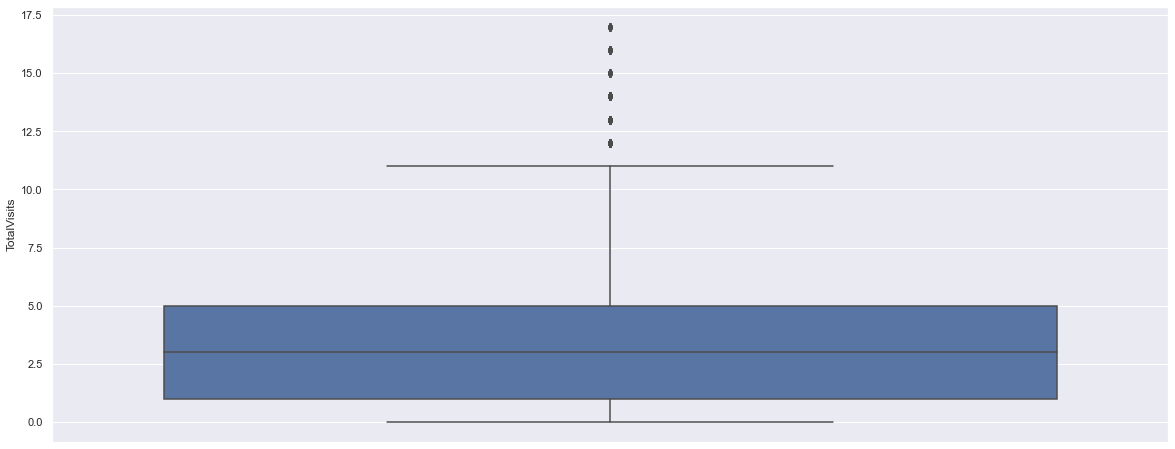

In [38]:
sns.boxplot(y=lead['TotalVisits'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

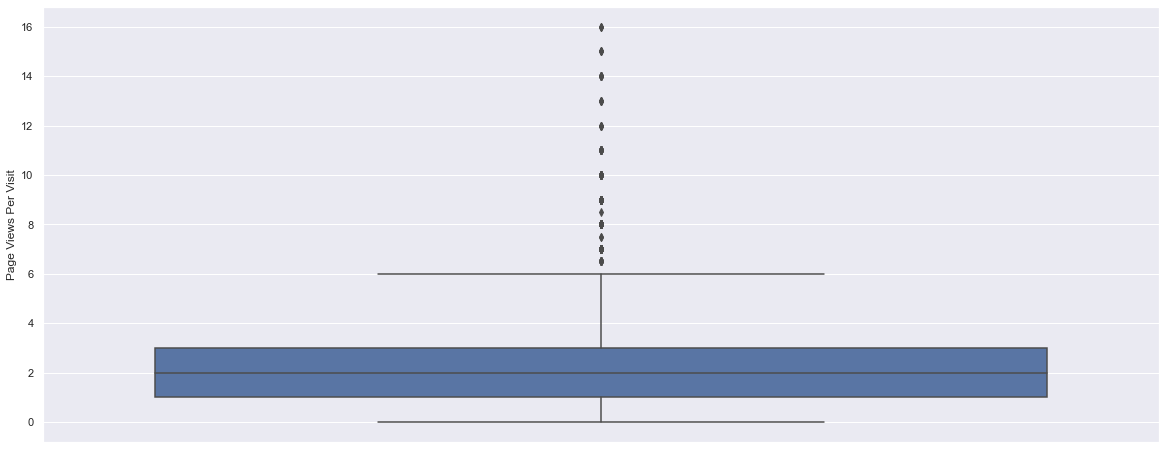

In [39]:
# Check next feature to handle NaN values "Page Views Per Visit" As this Feature is of Floating type

sns.boxplot(y=lead['Page Views Per Visit'])
plt.show


In [40]:
# It is clearly visible that there are outliers we can use percentile to check the values of outliers
lead['Page Views Per Visit'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.80, 0.85, 0.90, 0.95, 0.99])


count   9020.00
mean       2.34
std        2.06
min        0.00
5%         0.00
25%        1.00
50%        2.00
75%        3.00
80%        4.00
85%        4.00
90%        5.00
95%        6.00
99%        9.00
max       16.00
Name: Page Views Per Visit, dtype: float64

In [41]:
# 99 Percentile value is 9 we can use this to see how many rows are there where value is greater than 9
print("Count of lead where TotalVists are greater than 9 ->",lead[lead['Page Views Per Visit'] > 9]['Prospect ID'].count())
print("shape of the lead  ->",lead.shape[0])
Out_val = lead[lead['Page Views Per Visit'] > 9]['Prospect ID'].count()
print((Out_val/lead.shape[0])*100)


Count of lead where TotalVists are greater than 9 -> 67
shape of the lead  -> 9020
0.7427937915742794


In [42]:
# the value is 67 and the percentage is less than 1% so we can drop the values which are above 99% 
Q3 = lead['Page Views Per Visit'].quantile(0.99)
lead = lead[(lead['Page Views Per Visit']<= Q3)]


<function matplotlib.pyplot.show(close=None, block=None)>

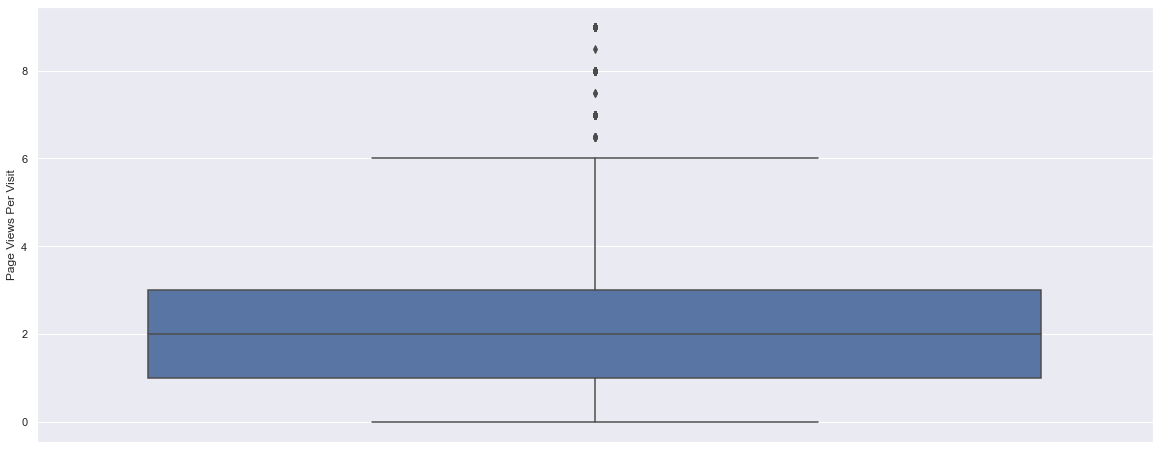

In [43]:

sns.boxplot(y=lead['Page Views Per Visit'])
plt.show


In [44]:
# As we dropped few rows so now we will need to see how many columns are left with null values 
(lead.isnull().sum()/len(lead)*100).sort_values(ascending=False)


Lead Source                                     0.32
Prospect ID                                     0.00
Magazine                                        0.00
A free copy of Mastering The Interview          0.00
I agree to pay the amount through cheque        0.00
City                                            0.00
Lead Profile                                    0.00
Get updates on DM Content                       0.00
Update me on Supply Chain Content               0.00
Tags                                            0.00
Receive More Updates About Our Courses          0.00
Through Recommendations                         0.00
Digital Advertisement                           0.00
Newspaper                                       0.00
X Education Forums                              0.00
Newspaper Article                               0.00
Search                                          0.00
Lead Number                                     0.00
What matters most to you in choosing a course 

In [45]:
# Checking the column Lead Source to fill the values depends upon the existing values 
lead['Lead Source'].value_counts(dropna=False)


Google               2836
Direct Traffic       2499
Olark Chat           1751
Organic Search       1092
Reference             442
Welingak Website      129
Referral Sites        117
Facebook               31
NaN                    29
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
Press_Release           1
NC_EDM                  1
Name: Lead Source, dtype: int64

#### According to the values we can spot few things like case mismatch like Google & google, Social Media & Facebook or we can definitely convert these values into a larger bucket which can accommodate these categories. Setting Unkonwn is not a correct option in this case because there are values which can be bucketed into a different category like something else or other and there are few rows with values of less than or equal to 6 count can be merge into other bucket 


In [46]:
lead['Lead Source'] = lead['Lead Source'].replace(np.nan,'Other')
lead['Lead Source'] = lead['Lead Source'].replace('google','Google')
lead['Lead Source'] = lead['Lead Source'].replace('Facebook','Social Media')


In [47]:
lead['Lead Source'].value_counts(dropna=False)

Google               2841
Direct Traffic       2499
Olark Chat           1751
Organic Search       1092
Reference             442
Welingak Website      129
Referral Sites        117
Social Media           33
Other                  29
bing                    6
Click2call              4
Live Chat               2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
Press_Release           1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [48]:
threshold = 7

# identify Lead Source with less than threshold occurrences
drop = lead['Lead Source'].value_counts().loc[lambda x: x<threshold].index

# find rows and update
lead.loc[lead['Lead Source'].isin(drop), 'Lead Source'] = 'Other'


In [49]:
lead['Lead Source'].value_counts(dropna=False)

Google              2841
Direct Traffic      2499
Olark Chat          1751
Organic Search      1092
Reference            442
Welingak Website     129
Referral Sites       117
Other                 49
Social Media          33
Name: Lead Source, dtype: int64

In [50]:
(lead.isnull().sum()/len(lead)*100).sort_values(ascending=False)


Prospect ID                                     0.00
Lead Number                                     0.00
A free copy of Mastering The Interview          0.00
I agree to pay the amount through cheque        0.00
City                                            0.00
Lead Profile                                    0.00
Get updates on DM Content                       0.00
Update me on Supply Chain Content               0.00
Tags                                            0.00
Receive More Updates About Our Courses          0.00
Through Recommendations                         0.00
Digital Advertisement                           0.00
Newspaper                                       0.00
X Education Forums                              0.00
Newspaper Article                               0.00
Magazine                                        0.00
Search                                          0.00
What matters most to you in choosing a course   0.00
What is your current occupation               

### All the NaN value treatment is done so we need to check the co relation or for the columns with most distinct values so we can drop otherwise the model will be overfitted and it is not an correct idea.


In [51]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    8953 non-null   object 
 1   Lead Number                                    8953 non-null   int64  
 2   Lead Origin                                    8953 non-null   object 
 3   Lead Source                                    8953 non-null   object 
 4   Do Not Email                                   8953 non-null   object 
 5   Do Not Call                                    8953 non-null   object 
 6   Converted                                      8953 non-null   int64  
 7   TotalVisits                                    8953 non-null   float64
 8   Total Time Spent on Website                    8953 non-null   int64  
 9   Page Views Per Visit                           8953 

In [52]:
# all the colums are having a value there are no missing values 
for i in lead.columns:
    print(i, lead[i].nunique())

Prospect ID 8953
Lead Number 8953
Lead Origin 4
Lead Source 9
Do Not Email 2
Do Not Call 2
Converted 2
TotalVisits 18
Total Time Spent on Website 1705
Page Views Per Visit 66
Last Activity 17
Country 38
Specialization 20
How did you hear about X Education 10
What is your current occupation 6
What matters most to you in choosing a course 3
Search 2
Magazine 1
Newspaper Article 2
X Education Forums 1
Newspaper 2
Digital Advertisement 2
Through Recommendations 2
Receive More Updates About Our Courses 1
Tags 27
Update me on Supply Chain Content 1
Get updates on DM Content 1
Lead Profile 7
City 7
I agree to pay the amount through cheque 1
A free copy of Mastering The Interview 2
Last Notable Activity 16


In [53]:
# There are first two colums  "Prospect ID" and "Lead Number" can be dropped because it is uniqune values 
lead.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [54]:
for i in lead.columns:
    print(i, lead[i].nunique())

Lead Origin 4
Lead Source 9
Do Not Email 2
Do Not Call 2
Converted 2
TotalVisits 18
Total Time Spent on Website 1705
Page Views Per Visit 66
Last Activity 17
Country 38
Specialization 20
How did you hear about X Education 10
What is your current occupation 6
What matters most to you in choosing a course 3
Search 2
Magazine 1
Newspaper Article 2
X Education Forums 1
Newspaper 2
Digital Advertisement 2
Through Recommendations 2
Receive More Updates About Our Courses 1
Tags 27
Update me on Supply Chain Content 1
Get updates on DM Content 1
Lead Profile 7
City 7
I agree to pay the amount through cheque 1
A free copy of Mastering The Interview 2
Last Notable Activity 16


In [55]:
# all the feature with nunique  count = 1 can be droppped 
lead.drop(['Magazine', 'X Education Forums', 'Receive More Updates About Our Courses'
           , 'Update me on Supply Chain Content', 'Get updates on DM Content'
           , 'I agree to pay the amount through cheque'], 1, inplace = True)



In [56]:
# Checking the column values where count is 2 to see the balance or else we can drop this too 
# if the values are inclined to a value which will not make any Difference   
lead['Do Not Email'].value_counts(dropna=False)

No     8256
Yes     697
Name: Do Not Email, dtype: int64

In [57]:
lead['Do Not Call'].value_counts(dropna=False)

No     8951
Yes       2
Name: Do Not Call, dtype: int64

In [58]:
lead['Search'].value_counts(dropna=False)

No     8940
Yes      13
Name: Search, dtype: int64

In [59]:
lead['Newspaper Article'].value_counts(dropna=False)

No     8952
Yes       1
Name: Newspaper Article, dtype: int64

In [60]:
lead['Newspaper'].value_counts(dropna=False)

No     8952
Yes       1
Name: Newspaper, dtype: int64

In [61]:
lead['Digital Advertisement'].value_counts(dropna=False)

No     8950
Yes       3
Name: Digital Advertisement, dtype: int64

In [62]:
lead['Through Recommendations'].value_counts(dropna=False)

No     8947
Yes       6
Name: Through Recommendations, dtype: int64

In [63]:
lead['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6155
Yes    2798
Name: A free copy of Mastering The Interview, dtype: int64

In [64]:
# except for the "A free copy of Mastering The Interview" all the colums are inclined to one value hence we can drop 
# these features to get better model 

lead.drop(['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'Newspaper', 'Digital Advertisement'
           , 'Through Recommendations'], 1, inplace = True)


In [65]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8953 non-null   object 
 1   Lead Source                                    8953 non-null   object 
 2   Converted                                      8953 non-null   int64  
 3   TotalVisits                                    8953 non-null   float64
 4   Total Time Spent on Website                    8953 non-null   int64  
 5   Page Views Per Visit                           8953 non-null   float64
 6   Last Activity                                  8953 non-null   object 
 7   Country                                        8953 non-null   object 
 8   Specialization                                 8953 non-null   object 
 9   How did you hear about X Education             8953 

In [66]:
for i in lead.columns:
    print(i, lead[i].nunique())

Lead Origin 4
Lead Source 9
Converted 2
TotalVisits 18
Total Time Spent on Website 1705
Page Views Per Visit 66
Last Activity 17
Country 38
Specialization 20
How did you hear about X Education 10
What is your current occupation 6
What matters most to you in choosing a course 3
Tags 27
Lead Profile 7
City 7
A free copy of Mastering The Interview 2
Last Notable Activity 16


In [67]:
lead['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4769
API                        3546
Lead Add Form               607
Lead Import                  31
Name: Lead Origin, dtype: int64

In [68]:
lead['Last Activity'].value_counts(dropna=False)

Email Opened                    3390
SMS Sent                        2700
Olark Chat Conversation          966
Page Visited on Website          594
Converted to Lead                428
Email Bounced                    310
Email Link Clicked               264
Form Submitted on Website        114
Unreachable                       88
Unsubscribed                      60
Had a Phone Conversation          24
Approached upfront                 5
View in browser link Clicked       4
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [69]:
lead['Country'].value_counts(normalize=True, dropna=False)

India                  0.97
United States          0.01
United Arab Emirates   0.01
Singapore              0.00
Saudi Arabia           0.00
United Kingdom         0.00
Australia              0.00
Qatar                  0.00
Bahrain                0.00
Hong Kong              0.00
Oman                   0.00
France                 0.00
Canada                 0.00
unknown                0.00
South Africa           0.00
Germany                0.00
Nigeria                0.00
Kuwait                 0.00
Sweden                 0.00
China                  0.00
Bangladesh             0.00
Belgium                0.00
Asia/Pacific Region    0.00
Uganda                 0.00
Philippines            0.00
Italy                  0.00
Ghana                  0.00
Liberia                0.00
Vietnam                0.00
Denmark                0.00
Switzerland            0.00
Tanzania               0.00
Netherlands            0.00
Malaysia               0.00
Kenya                  0.00
Sri Lanka           

In [70]:
# 97% values are belongs to one category hence it good to drop because it is inclined to 1 value 
lead.drop(['Country'], 1, inplace = True)


In [71]:
lead['Lead Origin'].value_counts(normalize=True)


Landing Page Submission   0.53
API                       0.40
Lead Add Form             0.07
Lead Import               0.00
Name: Lead Origin, dtype: float64

In [72]:
lead['Lead Source'].value_counts(normalize=True)

Google             0.32
Direct Traffic     0.28
Olark Chat         0.20
Organic Search     0.12
Reference          0.05
Welingak Website   0.01
Referral Sites     0.01
Other              0.01
Social Media       0.00
Name: Lead Source, dtype: float64

In [73]:
lead['Specialization'].value_counts(normalize=True)

Select                              0.21
Unknown                             0.16
Finance Management                  0.11
Human Resource Management           0.09
Marketing Management                0.09
Operations Management               0.06
Business Administration             0.04
IT Projects Management              0.04
Supply Chain Management             0.04
Banking, Investment And Insurance   0.04
Media and Advertising               0.02
Travel and Tourism                  0.02
International Business              0.02
Healthcare Management               0.02
E-COMMERCE                          0.01
Hospitality Management              0.01
Retail Management                   0.01
Rural and Agribusiness              0.01
E-Business                          0.01
Services Excellence                 0.00
Name: Specialization, dtype: float64

In [74]:
# There is chance of bucketing these into a bucket like management where there is a management in the string 
lead['Specialization'] = lead['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management')  



In [75]:
lead['Specialization'].value_counts(normalize=True)

Management                          0.46
Select                              0.21
Unknown                             0.16
Business Administration             0.04
Banking, Investment And Insurance   0.04
Media and Advertising               0.02
Travel and Tourism                  0.02
International Business              0.02
E-COMMERCE                          0.01
Rural and Agribusiness              0.01
E-Business                          0.01
Services Excellence                 0.00
Name: Specialization, dtype: float64

In [76]:
lead['How did you hear about X Education'].value_counts(normalize=True)


Select                  0.78
Online Search           0.09
Word Of Mouth           0.04
Student of SomeSchool   0.03
Other                   0.02
Multiple Sources        0.02
Advertisements          0.01
Social Media            0.01
Email                   0.00
SMS                     0.00
Name: How did you hear about X Education, dtype: float64

In [77]:
lead['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects     1.00
Flexibility & Convenience   0.00
Other                       0.00
Name: What matters most to you in choosing a course, dtype: float64

In [78]:
# almost 100% values belongs to one category hence we can drop this column
lead.drop(['What matters most to you in choosing a course'], 1, inplace = True)

In [79]:
for i in lead.columns:
    print(i, lead[i].nunique())

Lead Origin 4
Lead Source 9
Converted 2
TotalVisits 18
Total Time Spent on Website 1705
Page Views Per Visit 66
Last Activity 17
Specialization 12
How did you hear about X Education 10
What is your current occupation 6
Tags 27
Lead Profile 7
City 7
A free copy of Mastering The Interview 2
Last Notable Activity 16


In [80]:
lead['A free copy of Mastering The Interview'].value_counts(normalize=True)

No    0.69
Yes   0.31
Name: A free copy of Mastering The Interview, dtype: float64

In [81]:
lead['Tags'].value_counts(normalize=True)

Unknown                                             0.37
Will revert after reading the email                 0.22
Ringing                                             0.13
Interested in other courses                         0.06
Already a student                                   0.05
Closed by Horizzon                                  0.03
switched off                                        0.03
Busy                                                0.02
Lost to EINS                                        0.02
Not doing further education                         0.02
Interested  in full time MBA                        0.01
Graduation in progress                              0.01
invalid number                                      0.01
Diploma holder (Not Eligible)                       0.01
wrong number given                                  0.01
opp hangup                                          0.00
number not provided                                 0.00
in touch with EINS             

In [82]:
lead['Tags'] = lead['Tags'].replace(['Interested  in full time MBA', 'Graduation in progress', 'invalid number'
                                      , 'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup'
                                      , 'number not provided', 'in touch with EINS', 'Lost to Others'
                                      , 'Still Thinking', 'In confusion whether part time or DLP'
                                      , 'Interested in Next batch', 'Want to take admission but has financial problems'
                                      , 'Lateral student', 'Shall take in the next coming month'
                                      , 'University not recognized', 'Recognition issue (DEC approval)'] , 'Other')

In [83]:
lead['Tags'].value_counts(normalize=True)

Unknown                               0.37
Will revert after reading the email   0.22
Ringing                               0.13
Other                                 0.06
Interested in other courses           0.06
Already a student                     0.05
Closed by Horizzon                    0.03
switched off                          0.03
Busy                                  0.02
Lost to EINS                          0.02
Not doing further education           0.02
Name: Tags, dtype: float64

In [84]:
lead['Last Notable Activity'].value_counts(normalize=True)

Modified                       0.36
Email Opened                   0.31
SMS Sent                       0.24
Page Visited on Website        0.03
Olark Chat Conversation        0.02
Email Link Clicked             0.02
Email Bounced                  0.01
Unsubscribed                   0.01
Unreachable                    0.00
Had a Phone Conversation       0.00
Email Marked Spam              0.00
Approached upfront             0.00
Resubscribed to emails         0.00
View in browser link Clicked   0.00
Form Submitted on Website      0.00
Email Received                 0.00
Name: Last Notable Activity, dtype: float64

### We will check the values of remaining features with the target variable 

In [85]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8953 non-null   object 
 1   Lead Source                             8953 non-null   object 
 2   Converted                               8953 non-null   int64  
 3   TotalVisits                             8953 non-null   float64
 4   Total Time Spent on Website             8953 non-null   int64  
 5   Page Views Per Visit                    8953 non-null   float64
 6   Last Activity                           8953 non-null   object 
 7   Specialization                          8953 non-null   object 
 8   How did you hear about X Education      8953 non-null   object 
 9   What is your current occupation         8953 non-null   object 
 10  Tags                                    8953 non-null   obje

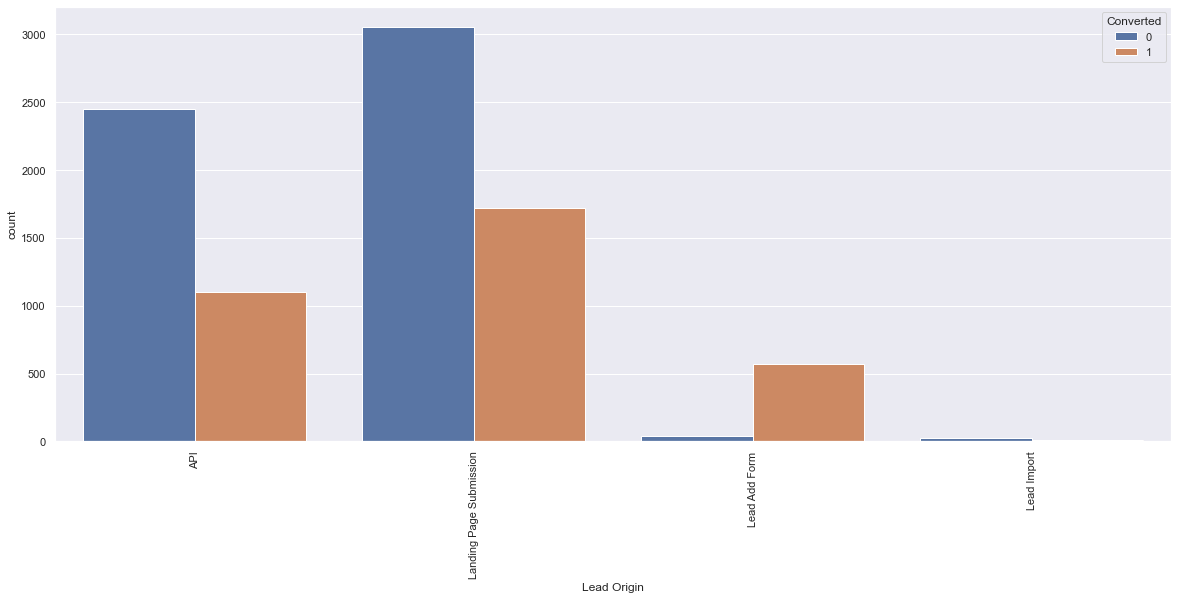

In [86]:
# Checking values against "Lead Origin"
ax1=sns.countplot(x = "Lead Origin", hue = "Converted", data = lead)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()


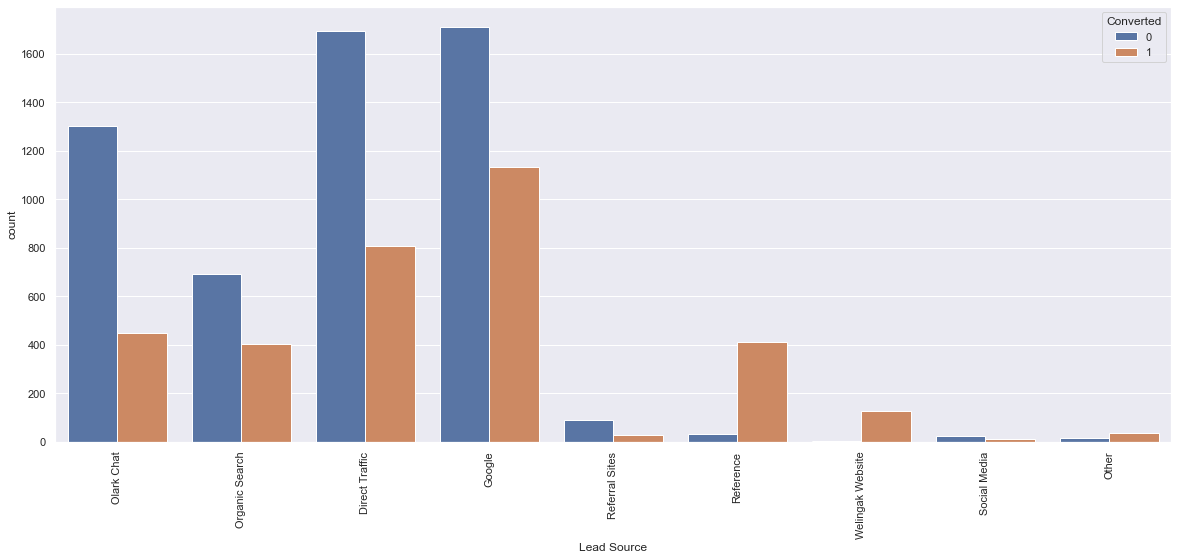

In [87]:
# Checking values against "Lead Source"
ax1=sns.countplot(x = "Lead Source", hue = "Converted", data = lead)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

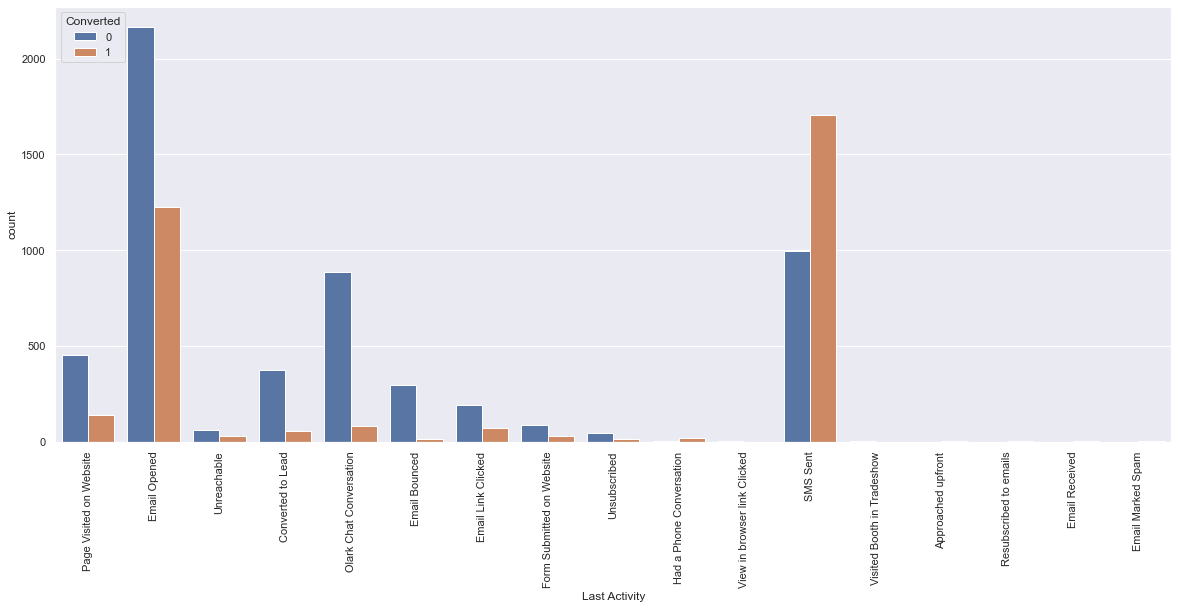

In [88]:
# Checking values against "Last Activity"
ax1=sns.countplot(x = "Last Activity", hue = "Converted", data = lead)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

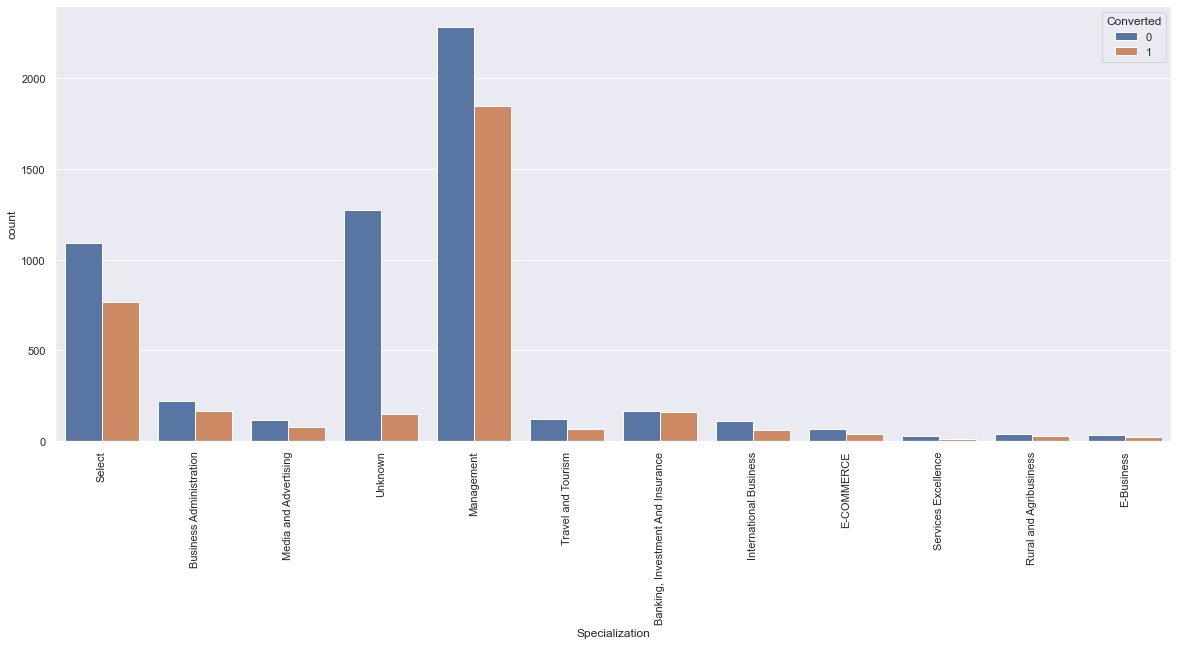

In [89]:
# Checking values against "Specialization"
ax1=sns.countplot(x = "Specialization", hue = "Converted", data = lead)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

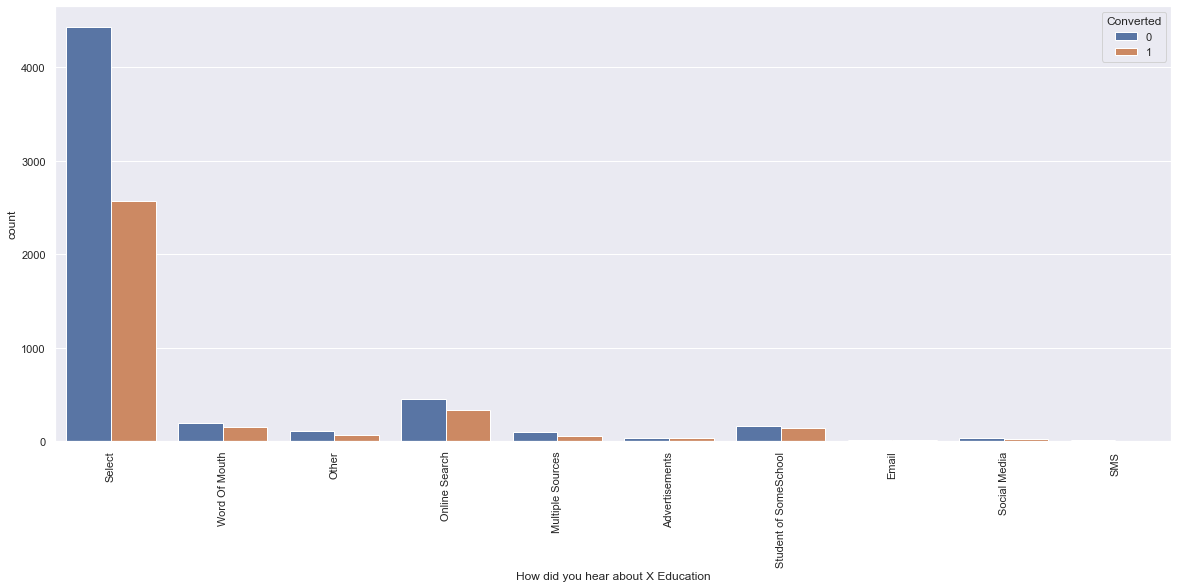

In [90]:
# Checking values against "How did you hear about X Education"
ax1=sns.countplot(x = "How did you hear about X Education", hue = "Converted", data = lead)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

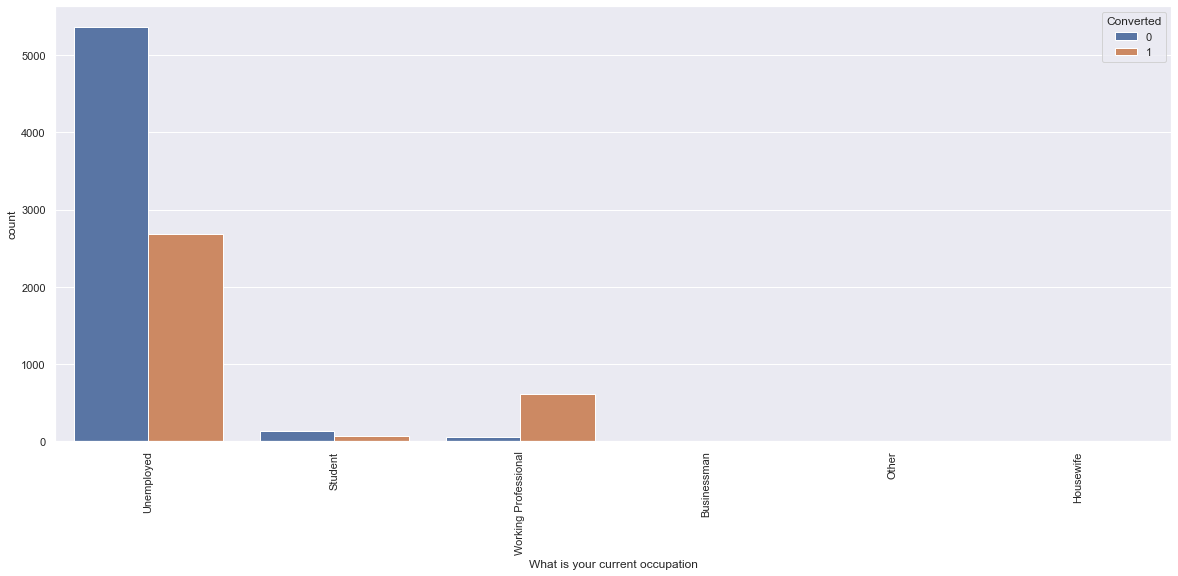

In [91]:
# Checking values against "What is your current Occupation"
ax1=sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

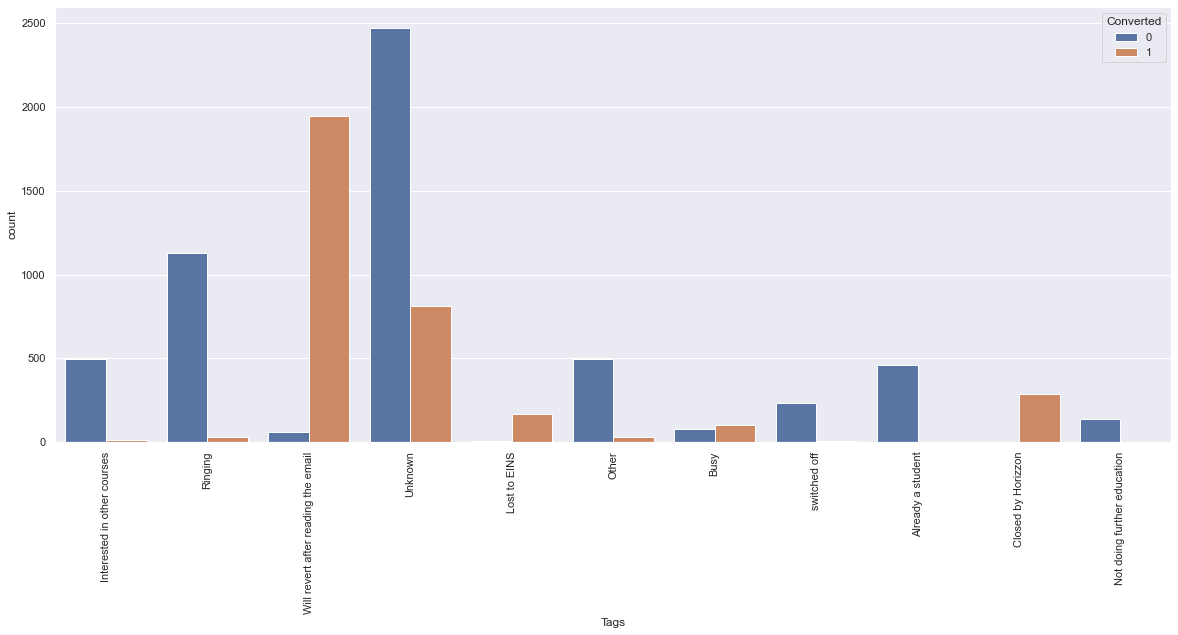

In [92]:
# Checking values against "Tags"
ax1=sns.countplot(x = "Tags", hue = "Converted", data = lead)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

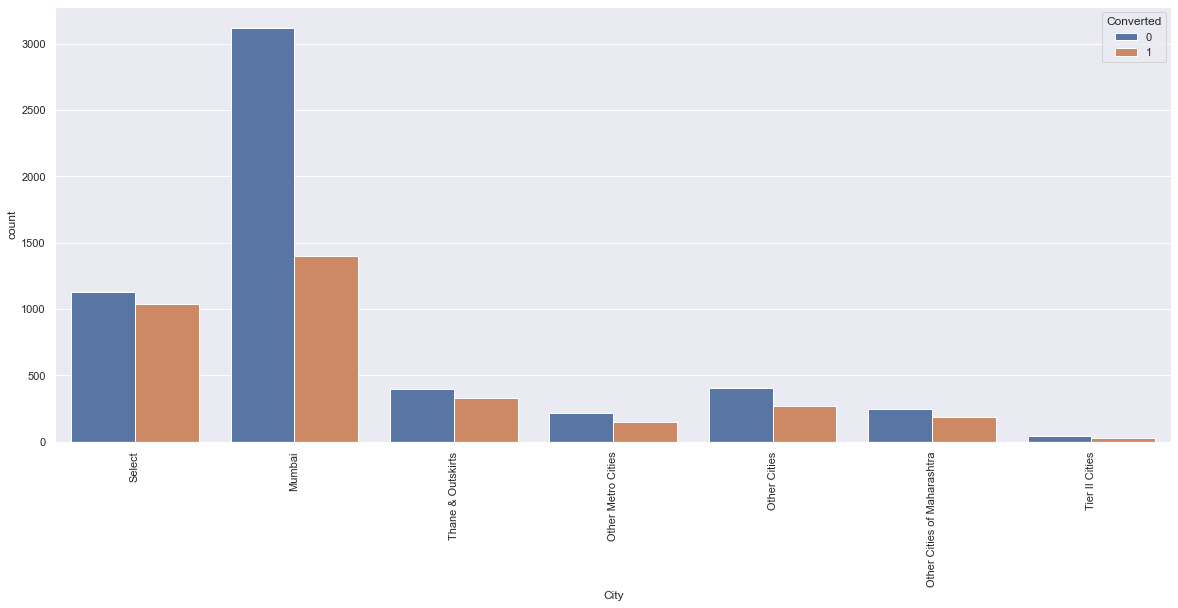

In [93]:
# Checking values against "City"
ax1=sns.countplot(x = "City", hue = "Converted", data = lead)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

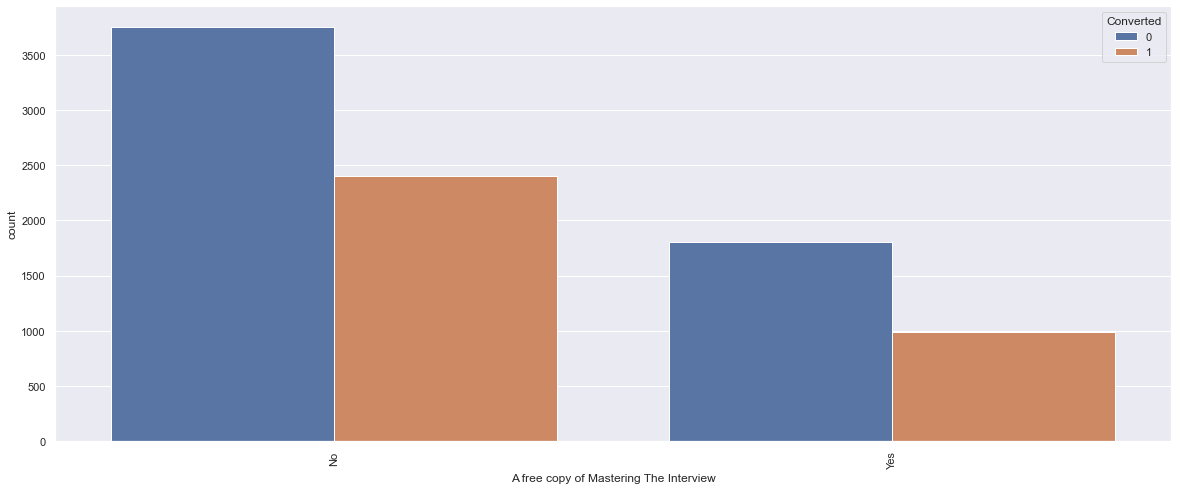

In [94]:
# Checking values against "Mastering The Interview"
ax1=sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

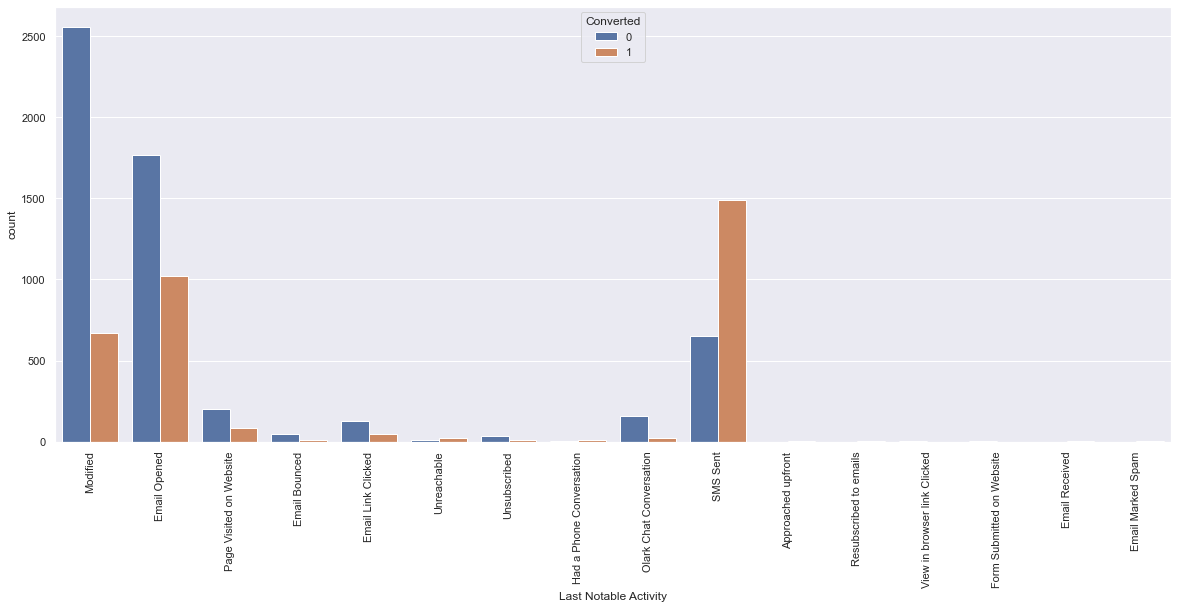

In [95]:
# Checking values against "Last Notable Activity"
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

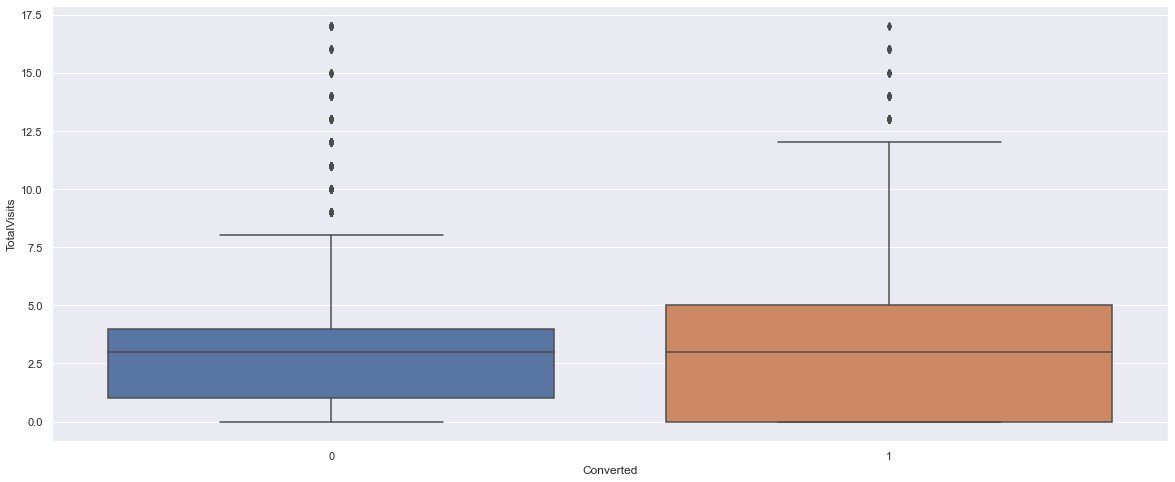

In [96]:
# now checking continuous variables 
sns.boxplot(x=lead.Converted, y=lead['TotalVisits'])
plt.show()

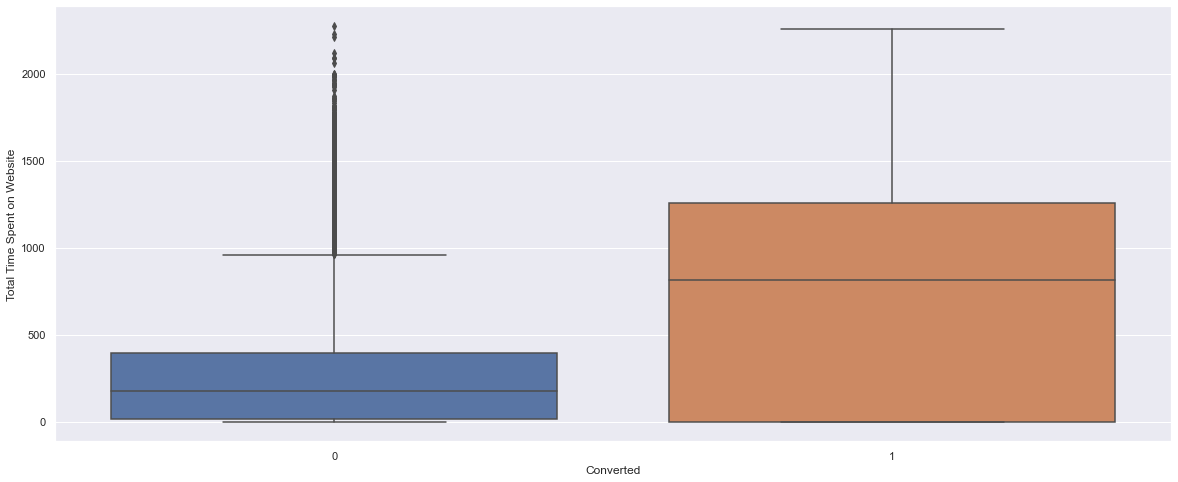

In [97]:
# now checking continuous varibles 
sns.boxplot(x=lead.Converted, y=lead['Total Time Spent on Website'])
plt.show()

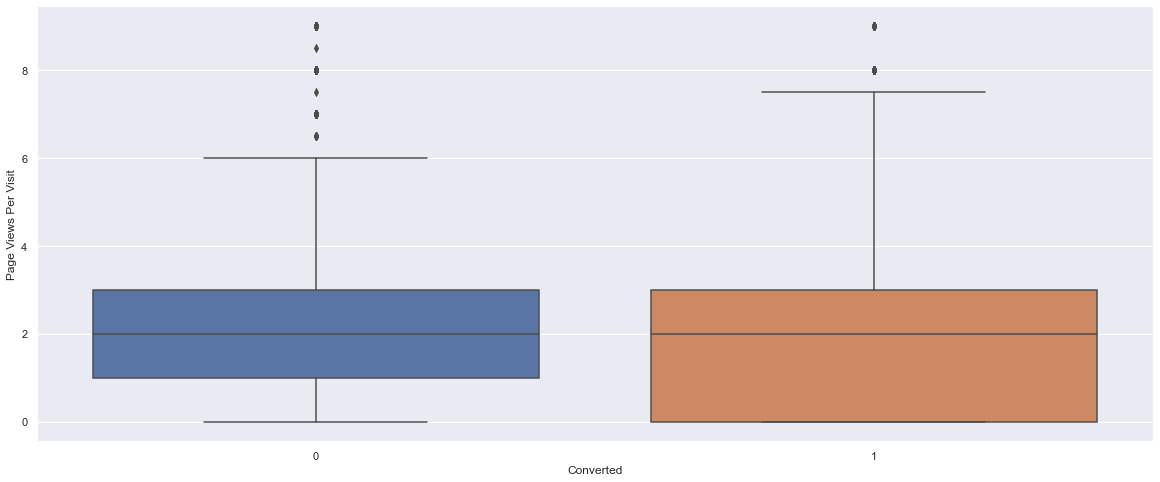

In [98]:
# now checking continuous varibales 
sns.boxplot(x=lead.Converted, y=lead['Page Views Per Visit'])
plt.show()

### Lead Origin
- API and the Landing Page Submission bring higher number of leads and conversion rate is on the higher side.
- Lead Add Form has a very high conversion rate but the count is not that big to make a decision.
- Lead Import Relatively vary low compared to other categories .
- In order to improve overall lead conversion rate, we have to improve lead conversion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

### Lead Source
- Most of leads are generated by Google and Direct traffic.
- Conversion Rate of reference leads and leads through welingak website is high.
- To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

### Last Activity
- SMS Sent have best conversion as compared to other options 
- Email opened have most number of Leads

### Specialization
- Management have the highest number of leads as well as conversion rate is also good 
- Banking investment and Insurance, Select & Busineess Administration have a fair conversion rate
- Unknown category have good number of leads but conversion rate is not that great


### How did you hear about X Education
- most number of leads are from Select and and conversion is fair
- Word of mouth, Online search & student at some school the conversion is fairly distributed but the number of leads are not that big

### What is your current occupation
- Conversion rate is great in case of Working professional 
- Number of leads in Unemployeed is high but the conversion is low
- Student the number of leads are low 
- Focus on Working professional 

### Tags
- There are categories where conversion rate is very great
- We will revert after reading the email is showing most converted leads are from this bucket
- Closed by Horizone is also show good conversion rate

### A free copy of Mastering The Interview
- This Feature is evenly poised in case of conversion percentage 

### Last Notable Activity
- SMS Sent have best conversion as compared to other options 
- Email opened have most number of Leads

In [99]:
Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

37.92025019546521

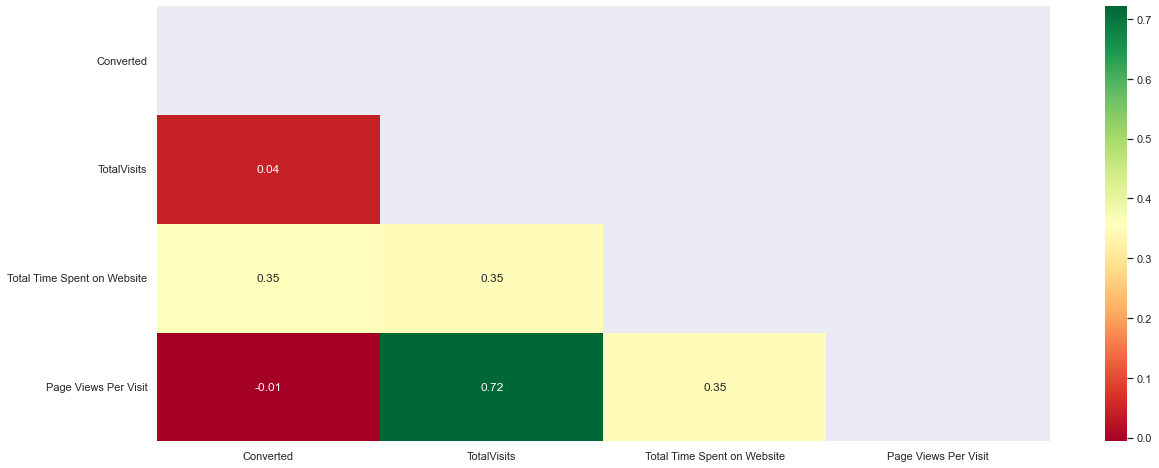

In [100]:
mask = np.triu(np.ones_like(lead.corr()))
sns.heatmap(lead.corr(), annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f', mask=mask)
plt.show()


#### 
- Total Visits are having strong co relation to the Total Time Spent on website
- Conversion is negatively correlated to page view pe visits 

### Dummy Variable Creation


In [101]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8953 non-null   object 
 1   Lead Source                             8953 non-null   object 
 2   Converted                               8953 non-null   int64  
 3   TotalVisits                             8953 non-null   float64
 4   Total Time Spent on Website             8953 non-null   int64  
 5   Page Views Per Visit                    8953 non-null   float64
 6   Last Activity                           8953 non-null   object 
 7   Specialization                          8953 non-null   object 
 8   How did you hear about X Education      8953 non-null   object 
 9   What is your current occupation         8953 non-null   object 
 10  Tags                                    8953 non-null   obje

In [102]:
# Creating the binary map variable to handle Yes No values 
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

In [103]:
# All the categorical variables are stored into a list which can be used to drop columns after dummy creation
cat_cols= lead.select_dtypes(include=['object']).columns
cat_cols


Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'Tags', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [104]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(lead[['Lead Origin']], drop_first=True, prefix  = 'Lead Origin')
lead = pd.concat([lead,dummy],1)

In [105]:
lead.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,API,Olark Chat,0,0.00,0,0.00,Page Visited on Website,Select,Select,Unemployed,Interested in other courses,Select,Select,No,Modified,0,0,0
1,API,Organic Search,0,5.00,674,2.50,Email Opened,Select,Select,Unemployed,Ringing,Select,Select,No,Email Opened,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.00,1532,2.00,Email Opened,Business Administration,Select,Student,Will revert after reading the email,Potential Lead,Mumbai,Yes,Email Opened,1,0,0
3,Landing Page Submission,Direct Traffic,0,1.00,305,1.00,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Ringing,Select,Mumbai,No,Modified,1,0,0
4,Landing Page Submission,Google,1,2.00,1428,1.00,Converted to Lead,Select,Other,Unemployed,Will revert after reading the email,Select,Mumbai,No,Modified,1,0,0


In [106]:
dummy = pd.get_dummies(lead['Lead Source'], drop_first=True, prefix  = 'Lead Source')
lead = pd.concat([lead, dummy], axis = 1)


In [107]:
dummy = pd.get_dummies(lead['Last Activity'], drop_first=True, prefix  = 'Last Activity')
lead = pd.concat([lead, dummy], axis = 1)


In [108]:
dummy = pd.get_dummies(lead['Specialization'], drop_first=True, prefix  = 'Specialization')
lead = pd.concat([lead, dummy], axis = 1)

In [109]:
dummy = pd.get_dummies(lead['How did you hear about X Education'], drop_first=True, prefix  = 'How did you hear about X Education')
lead = pd.concat([lead, dummy], axis = 1)

In [110]:
dummy = pd.get_dummies(lead['Tags'], drop_first=True, prefix  = 'Tags')
lead = pd.concat([lead, dummy], axis = 1)


In [111]:
dummy = pd.get_dummies(lead['Lead Profile'], drop_first=True, prefix  = 'Lead Profile')
lead = pd.concat([lead, dummy], axis = 1)


In [112]:
dummy = pd.get_dummies(lead['City'], drop_first=True, prefix  = 'City')
lead = pd.concat([lead, dummy], axis = 1)


In [113]:
binary_map_var = ['A free copy of Mastering The Interview']
lead[binary_map_var] = lead[binary_map_var].apply(binary_map)

In [114]:
dummy = pd.get_dummies(lead['Last Notable Activity'], drop_first=True, prefix  = 'Last Notable Activity')
lead = pd.concat([lead, dummy], axis = 1)



In [115]:
#dropping the original columns after dummy variable creation

lead.drop(cat_cols,1,inplace = True)

In [116]:
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_Unknown,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,Tags_switched off,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.00,0,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.00,674,2.50,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.00,1532,2.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.00,305,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.00,1428,1.00,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Train-Test Split & Logistic Regression Model Building:

In [117]:
from sklearn.model_selection import train_test_split

# setting Target variable to y
y = lead['Converted']
y.head()
X=lead.drop('Converted', axis=1)

In [118]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=25)


In [119]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 3634 to 8792
Data columns (total 87 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   TotalVisits                                               6267 non-null   float64
 1   Total Time Spent on Website                               6267 non-null   int64  
 2   Page Views Per Visit                                      6267 non-null   float64
 3   Lead Origin_Landing Page Submission                       6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                                 6267 non-null   uint8  
 5   Lead Origin_Lead Import                                   6267 non-null   uint8  
 6   Lead Source_Google                                        6267 non-null   uint8  
 7   Lead Source_Olark Chat                                    6267 non-null   uint8  
 8   Lead Source_Org

In [120]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_Unknown,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,Tags_switched off,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3634,-0.40,0.48,-0.15,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7251,-0.74,-0.45,-0.67,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3002,-0.05,0.72,0.38,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3005,-0.05,1.87,0.38,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2550,-0.05,0.23,0.38,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [121]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=18) 

rfe = rfe.fit(X_train, y_train)

In [122]:
rfe.support_

array([False,  True, False, False,  True, False, False,  True, False,
       False, False, False, False,  True,  True,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False,  True,
        True, False,  True,  True,  True,  True, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False])

In [123]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 32),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 33),
 ('Lead Origin_Landing Page Submission', False, 41),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 37),
 ('Lead Source_Google', False, 61),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 62),
 ('Lead Source_Other', False, 43),
 ('Lead Source_Reference', False, 40),
 ('Lead Source_Referral Sites', False, 59),
 ('Lead Source_Social Media', False, 49),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 30),
 ('Last Activity_Email Marked Spam', False, 65),
 ('Last Activity_Email Opened', False, 28),
 ('Last Activity_Email Received', False, 53),
 ('Last Activity_Form Submitted on Website', False, 45),
 ('Last Activity_Had a Phone Conversation', False, 7),
 ('Last Activity_Olark Chat Conversation',

In [124]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing', 'Tags_Unknown',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Profile_Student of SomeSchool', 'Lead Profile_Unknown',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [125]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Organic Search', 'Lead Source_Other',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Spec

In [126]:
# Model - 1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6248
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1063.4
Date:                Sun, 19 Mar 2023   Deviance:                       2126.8
Time:                        16:00:25   Pearson chi2:                 1.24e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6275
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.0589      0.227    -17.875      0.000      -4.504      -3.614
Total Time Spent on Website                  1.0893      0.067     16.362      0.000       0.959       1.220
Lead Origin_Lead Add Form                    1.6597      0.436      3.804      0.000       0.805       2.515
Lead Source_Olark Chat                       1.1499      0.166      6.912      0.000       0.824       1.476
Lead Source_Welingak Website                 2.9496      1.122      2.628      0.009       0.750       5.149
Last Activity_Converted to Lead             -1.4558      0.377     -3.863      0.000      -2.195      -0.717
Last Activity_Email Bounced                 -2.0697      0.486     -4.255      0.000      -3.023      -1.116
Last Activity_Olark Chat Conversation       -1.4179      0.235     -6.024      0.000      -1.879      -0.957
Tags_Busy                                    2.8245      0.317      8.906      0.000       2.203       3.446
Tags_Closed by Horizzon                      8.2567      0.768     10.757      0.000       6.752       9.761
Tags_Lost to EINS                            8.7806      0.694     12.659      0.000       7.421      10.140
Tags_Not doing further education            -0.6717      1.044     -0.643      0.520      -2.718       1.375
Tags_Ringing                                -1.3818      0.314     -4.396      0.000      -1.998      -0.766
Tags_Unknown                                 3.9577      0.255     15.505      0.000       3.457       4.458
Tags_Will revert after reading the email     6.7220      0.279     24.058      0.000       6.174       7.270
Tags_switched off                           -1.5799      0.576     -2.744      0.006      -2.708      -0.451
Lead Profile_Student of SomeSchool          -2.0769      0.822     -2.527      0.012      -3.688      -0.466
Lead Profile_Unknown                        -2.4648      0.160    -15.387      0.000      -2.779      -2.151
Last Notable Activity_SMS Sent               2.4017      0.144     16.652      0.000       2.119       2.684
============================================================================================================
"""

In [127]:

col = col.drop('Tags_Not doing further education',1)


In [128]:
# Model 2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6249
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1063.6
Date:                Sun, 19 Mar 2023   Deviance:                       2127.3
Time:                        16:00:25   Pearson chi2:                 1.22e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6274
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.0971      0.222    -18.441      0.000      -4.533      -3.662
Total Time Spent on Website                  1.0891      0.067     16.363      0.000       0.959       1.220
Lead Origin_Lead Add Form                    1.6599      0.436      3.805      0.000       0.805       2.515
Lead Source_Olark Chat                       1.1510      0.166      6.915      0.000       0.825       1.477
Lead Source_Welingak Website                 2.9511      1.122      2.629      0.009       0.751       5.151
Last Activity_Converted to Lead             -1.4580      0.377     -3.872      0.000      -2.196      -0.720
Last Activity_Email Bounced                 -2.0776      0.485     -4.284      0.000      -3.028      -1.127
Last Activity_Olark Chat Conversation       -1.4167      0.235     -6.017      0.000      -1.878      -0.955
Tags_Busy                                    2.8612      0.314      9.113      0.000       2.246       3.477
Tags_Closed by Horizzon                      8.2948      0.766     10.827      0.000       6.793       9.796
Tags_Lost to EINS                            8.8190      0.692     12.742      0.000       7.462      10.176
Tags_Ringing                                -1.3466      0.311     -4.325      0.000      -1.957      -0.736
Tags_Unknown                                 3.9950      0.251     15.906      0.000       3.503       4.487
Tags_Will revert after reading the email     6.7599      0.276     24.536      0.000       6.220       7.300
Tags_switched off                           -1.5447      0.574     -2.690      0.007      -2.670      -0.419
Lead Profile_Student of SomeSchool          -2.0654      0.827     -2.499      0.012      -3.685      -0.445
Lead Profile_Unknown                        -2.4652      0.160    -15.386      0.000      -2.779      -2.151
Last Notable Activity_SMS Sent               2.4055      0.144     16.679      0.000       2.123       2.688
============================================================================================================
"""

In [129]:
# p-values are in acceptable range 
# we can check the Variance Inflation Factor to see if there is any correlation between the variables

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
11,Tags_Unknown,5.64
15,Lead Profile_Unknown,5.01
2,Lead Source_Olark Chat,1.85
1,Lead Origin_Lead Add Form,1.81
12,Tags_Will revert after reading the email,1.67
16,Last Notable Activity_SMS Sent,1.64
0,Total Time Spent on Website,1.49
6,Last Activity_Olark Chat Conversation,1.40
3,Lead Source_Welingak Website,1.39
8,Tags_Closed by Horizzon,1.17


In [130]:
col = col.drop('Tags_Unknown',1)

In [131]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
1,Lead Origin_Lead Add Form,1.80
2,Lead Source_Olark Chat,1.75
11,Tags_Will revert after reading the email,1.61
15,Last Notable Activity_SMS Sent,1.56
0,Total Time Spent on Website,1.46
6,Last Activity_Olark Chat Conversation,1.40
14,Lead Profile_Unknown,1.33
3,Lead Source_Welingak Website,1.30
8,Tags_Closed by Horizzon,1.17
10,Tags_Ringing,1.12


In [132]:
# VIF is also in Acceptable range hence build a 
# Model - 3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6250
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1252.4
Date:                Sun, 19 Mar 2023   Deviance:                       2504.8
Time:                        16:00:25   Pearson chi2:                 1.31e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6043
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.0742      0.106    -19.586      0.000      -2.282      -1.867
Total Time Spent on Website                  1.0795      0.060     17.952      0.000       0.962       1.197
Lead Origin_Lead Add Form                    1.7146      0.393      4.360      0.000       0.944       2.485
Lead Source_Olark Chat                       1.5558      0.152     10.223      0.000       1.258       1.854
Lead Source_Welingak Website                 4.8345      1.103      4.383      0.000       2.673       6.996
Last Activity_Converted to Lead             -1.5960      0.341     -4.676      0.000      -2.265      -0.927
Last Activity_Email Bounced                 -2.0334      0.498     -4.082      0.000      -3.010      -1.057
Last Activity_Olark Chat Conversation       -1.4086      0.222     -6.338      0.000      -1.844      -0.973
Tags_Busy                                    0.7679      0.253      3.030      0.002       0.271       1.265
Tags_Closed by Horizzon                      6.2663      0.742      8.445      0.000       4.812       7.721
Tags_Lost to EINS                            6.0031      0.681      8.820      0.000       4.669       7.337
Tags_Ringing                                -3.4972      0.251    -13.914      0.000      -3.990      -3.005
Tags_Will revert after reading the email     4.7062      0.197     23.881      0.000       4.320       5.092
Tags_switched off                           -3.6663      0.544     -6.740      0.000      -4.732      -2.600
Lead Profile_Student of SomeSchool          -2.8040      0.584     -4.805      0.000      -3.948      -1.660
Lead Profile_Unknown                        -0.6588      0.121     -5.442      0.000      -0.896      -0.422
Last Notable Activity_SMS Sent               2.5122      0.129     19.414      0.000       2.259       2.766
============================================================================================================
"""

In [133]:
# Prediction data creation on train data 
y_train_pred = res.predict(X_train_sm)
y_train_pred[:15]


3634   0.03
7251   0.00
3002   0.01
3005   0.99
2550   0.08
3392   0.25
2569   0.11
7510   0.03
8155   0.07
2500   0.92
2309   0.03
2348   0.06
6536   0.96
1723   0.99
4778   0.21
dtype: float64

In [134]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:15]

array([2.69696116e-02, 9.45763690e-04, 8.19575123e-03, 9.90506866e-01,
       7.69575778e-02, 2.45061063e-01, 1.06488269e-01, 2.79890011e-02,
       7.09305040e-02, 9.23338029e-01, 3.03822318e-02, 5.68232626e-02,
       9.62234994e-01, 9.89792275e-01, 2.12562619e-01])

In [135]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.03,3634
1,0,0.00,7251
2,0,0.01,3002
3,1,0.99,3005
4,0,0.08,2550


In [136]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()


,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.03,3634,0
1,0,0.00,7251,0
2,0,0.01,3002,0
3,1,0.99,3005,1
4,0,0.08,2550,0


In [137]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3752  142]
 [ 301 2072]]


In [138]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.929312270623903


In [139]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [140]:
print("Sensitivity->", TP / float(TP+FN))
print("Specificity->", TN / float(TN+FP))
print("False Postive Rate->", TN / float(TN+FP))
print("Positive predictive value->", TP / float(TP+FP))
print("Negative predictive value->", TN / float(TN+ FN))


Sensitivity-> 0.8731563421828908
Specificity-> 0.9635336414997432
False Postive Rate-> 0.9635336414997432
Positive predictive value-> 0.935862691960253
Negative predictive value-> 0.92573402417962


- With the current cut off as 0.5 we have around 92% accuracy, sensitivity of around 87% and specificity of around 96%.


In [141]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [142]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )



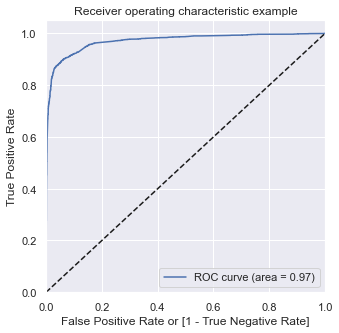

In [143]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

- The ROC Curve should be a value close to 1. 
- The area under ROC curve is 0.97 which is a very good predictive model 


In [144]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.03,3634,0,1,0,0,0,0,0,0,0,0,0
1,0,0.00,7251,0,1,0,0,0,0,0,0,0,0,0
2,0,0.01,3002,0,1,0,0,0,0,0,0,0,0,0
3,1,0.99,3005,1,1,1,1,1,1,1,1,1,1,1
4,0,0.08,2550,0,1,0,0,0,0,0,0,0,0,0


In [145]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df


,prob,accuracy,sensi,speci
0.00,0.00,0.38,1.00,0.00
0.10,0.10,0.84,0.97,0.76
0.20,0.20,0.90,0.93,0.89
0.30,0.30,0.92,0.91,0.93
0.40,0.40,0.93,0.89,0.95
0.50,0.50,0.93,0.87,0.96
0.60,0.60,0.93,0.85,0.97
0.70,0.70,0.92,0.83,0.98
0.80,0.80,0.91,0.78,0.98
0.90,0.90,0.89,0.72,0.99


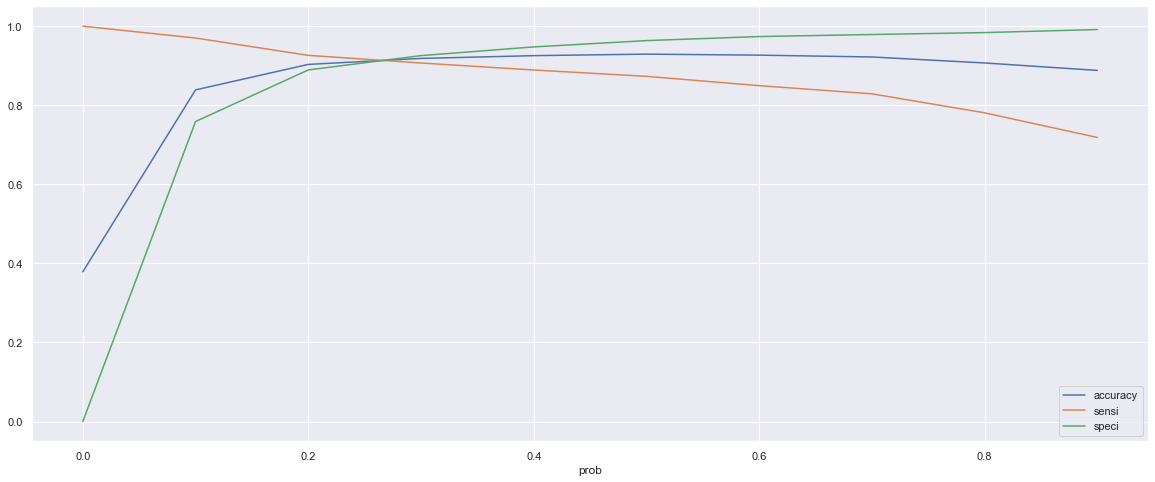

In [146]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [147]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.03,3634,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.00,7251,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.01,3002,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.99,3005,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.08,2550,0,1,0,0,0,0,0,0,0,0,0,0


In [148]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.03,3634,0,3
1,0,0.00,7251,0,0
2,0,0.01,3002,0,1
3,1,0.99,3005,1,99
4,0,0.08,2550,0,8


In [149]:
# accuracy check.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9184617839476623

In [150]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3604,  290],
       [ 221, 2152]], dtype=int64)

In [151]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [152]:
print("Sensitivity->", TP / float(TP+FN))
print("Specificity->", TN / float(TN+FP))
print("False Postive Rate->", TN / float(TN+FP))
print("Positive predictive value->", TP / float(TP+FP))
print("Negative predictive value->", TN / float(TN+ FN))


Sensitivity-> 0.9068689422671724
Specificity-> 0.9255264509501797
False Postive Rate-> 0.9255264509501797
Positive predictive value-> 0.8812448812448812
Negative predictive value-> 0.9422222222222222


In [153]:
from sklearn.metrics import precision_score, recall_score

In [154]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8812448812448812

In [155]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9068689422671724

In [156]:
from sklearn.metrics import precision_recall_curve

In [157]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

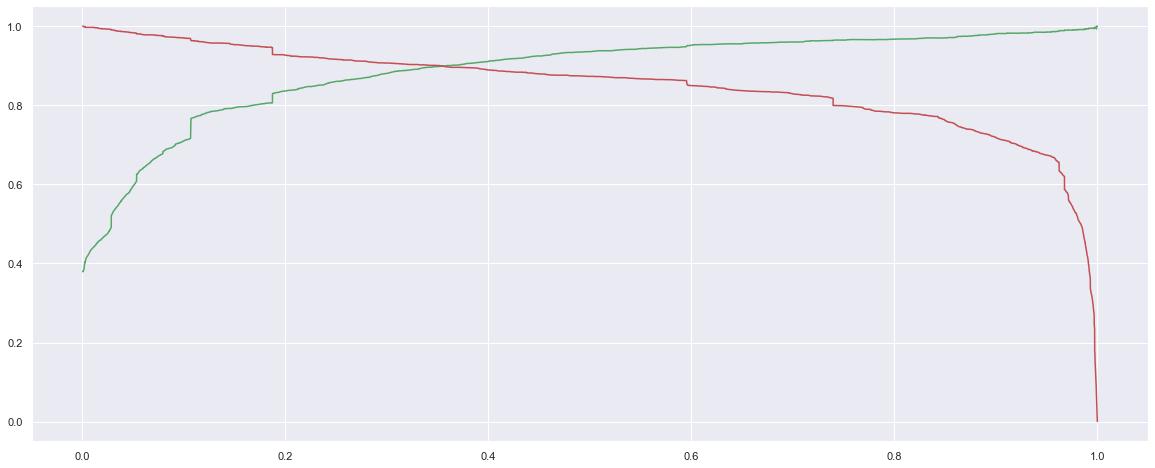

In [158]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [159]:
# Scaling test 
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_Unknown,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,Tags_switched off,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
9173,-0.73,-0.78,-0.66,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5528,0.65,-0.60,0.14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6179,-0.04,1.78,-0.39,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9212,0.65,-0.73,1.47,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6227,-1.08,-0.87,-1.19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [160]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,Last Notable Activity_SMS Sent
9173,-0.78,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
5528,-0.60,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
6179,1.78,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
9212,-0.73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6227,-0.87,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [161]:
X_test_sm = sm.add_constant(X_test)

In [162]:
# Predictions 
y_test_pred = res.predict(X_test_sm)

In [163]:
y_test_pred[:10]

9173   0.00
5528   0.87
6179   1.00
9212   0.05
6227   0.03
5604   0.08
6095   1.00
1330   0.08
7212   0.99
7258   0.03
dtype: float64

In [164]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
9173,0.00
5528,0.87
6179,1.00
9212,0.05
6227,0.03


In [165]:
y_test_df = pd.DataFrame(y_test)
y_test_df['Prospect ID'] = y_test_df.index

In [166]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,9173,0.00
1,1,5528,0.87
2,1,6179,1.00
3,0,9212,0.05
4,0,6227,0.03


In [167]:

# Rearranging the columns
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,9173,0,0.00,0
1,5528,1,0.87,87
2,6179,1,1.00,100
3,9212,0,0.05,5
4,6227,0,0.03,3


In [168]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,9173,0,0.00,0,0
1,5528,1,0.87,87,1
2,6179,1,1.00,100,1
3,9212,0,0.05,5,0
4,6227,0,0.03,3,0


In [169]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9110201042442293

In [170]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1526,  138],
       [ 101,  921]], dtype=int64)

In [171]:
print("Sensitivity->", TP / float(TP+FN))
print("Specificity->", TN / float(TN+FP))
print("False Postive Rate->", TN / float(TN+FP))
print("Positive predictive value->", TP / float(TP+FP))
print("Negative predictive value->", TN / float(TN+ FN))
print("precision_score->", precision_score(y_pred_final.Converted , y_pred_final.final_Predicted))
print("recall_score->",recall_score(y_pred_final.Converted, y_pred_final.final_Predicted))

Sensitivity-> 0.9068689422671724
Specificity-> 0.9255264509501797
False Postive Rate-> 0.9255264509501797
Positive predictive value-> 0.8812448812448812
Negative predictive value-> 0.9422222222222222
precision_score-> 0.8696883852691218
recall_score-> 0.901174168297456


#### Train Vs Test 
#### Train 
- Accuracy : 91.84%
- Sensitivity : 90.68%
- Specificity : 92.55%


#### Test Data
- Accuracy : 91.10%
- Sensitivity : 90.68%
- Specificity : 92.55%

### The Model prediction is very good it can give confidence to make good calls using this model